# Breast Cancer Prediction

The purpose of this project is to build a predictive model that can classify a tumor as benign or malignant based in the characteristics of the cell nuclei obtained of the digitized image of a FNA (Fine Needle Aspiration Biopsy) of a breast mass.
The data used for the project is available on [https://www.kaggle.com/uciml/breast-cancer-wisconsin-data]

 

## 1. Data Wrangling

### Dataset Information
The dataset contains 569 samples 
The following are the Attribute Information:
1) ID number

2) Diagnosis (M = malignant, B = benign)

-3-32.Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values. Each pixel of an image is represented by the 8-bit integer, or a byte, from 0 to 255 providing the amount of light, where 0 is clear black and 255 is clear white. The darker the image is the lower is the mean of intensity level of a pixel, i.e. byte. So, the SD of gray-scale values means how intense levels are spread for particular individual cells. The higher SD the more contrasting the image is.)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g). concavity (severity of concave portions of the contour.The concavity is captured by drawing chords between two boundary points, which lie outside the nuclear. For the concavity_mean the mean value of these lengths is calculated)

h). concave points (number of concave portions of the contour)

i). symmetry (to meeasure the symmetry the major axis, or longest chord through the center, is found. We then measure the length difference between lines perpendicular to the major axis and the nuclear boundary in both directions)

j). fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.

In [25]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import plotly
import plotly.express as ex
import plotly.graph_objs as go
import ipywidgets 
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from library.sb_utils import save_file

### Importing the data

In [26]:
# df = pd.read_csv("../input/data.csv", index_col = 'id')
df=pd.read_csv(r'C:\Users\avel8\OneDrive\Documents\SPRINGBOARD\Capstone_two\breast_cancer_data.csv', index_col = 'id')

### Exploring Imported Data

In [27]:
# Reading the first 5 rows
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [28]:
# Print test Data Frame summary
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

__Observation__
One categorical variable and 30 numerical

### Checking for Missing values

In [29]:
# Finding missing values
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['Count', 'percentages' ]
missing.sort_values(by='Count')

,Count,percentages
diagnosis,0,0.0
concave points_worst,0,0.0
concavity_worst,0,0.0
compactness_worst,0,0.0
smoothness_worst,0,0.0
area_worst,0,0.0
perimeter_worst,0,0.0
texture_worst,0,0.0
radius_worst,0,0.0
fractal_dimension_se,0,0.0


__Observation__
There is no missing values and no NAN. The data is very clean.

## 2. Exploratory Data Analysis and Data Visualization

In [30]:
# Review the general statistics of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [31]:
# The target variable is the diagnosis. Let's chek the distribuition of the target
df['diagnosis'].value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

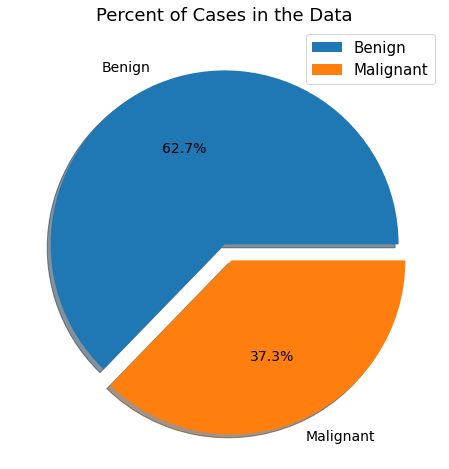

In [32]:
# visuallization of the diagnosis distribuition
# Pie chart representation
pie_labels = ['Benign', 'Malignant']

#Number of benign and malignant cases
pie_y = df['diagnosis'].value_counts()

pie_explode = [0, 0.1]

plt.figure(figsize=(10, 8))
plt.pie(pie_y, labels=pie_labels, shadow=True,  autopct='%1.1f%%', explode=pie_explode, textprops={'fontsize': 14})
plt.legend()
plt.title("Percent of Cases in the Data")
plt.show()

__Observation__
The mayority are Bening cases with 62,7 percent. Malignant are 37.3 percent.
The Diagnosis is the target feature

In [33]:
#check diagnosis types count
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [34]:
#making the diagnosis a numerical Value
df.diagnosis.replace({"M":1,"B":0},inplace=True)
df.diagnosis.unique()
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [35]:
df_copy = df.copy()

### Univariate Analysis

In [40]:
# features_mean=list(df.columns[1:11])
df = df_copy.copy()
features=list(df.loc[:,["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean",
                       "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave points_se", "symmetry_se", "fractal_dimension_se",
                       "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst", "fractal_dimension_worst"]])
dfM=df[df['diagnosis'] ==1]
dfB=df[df['diagnosis'] ==0]

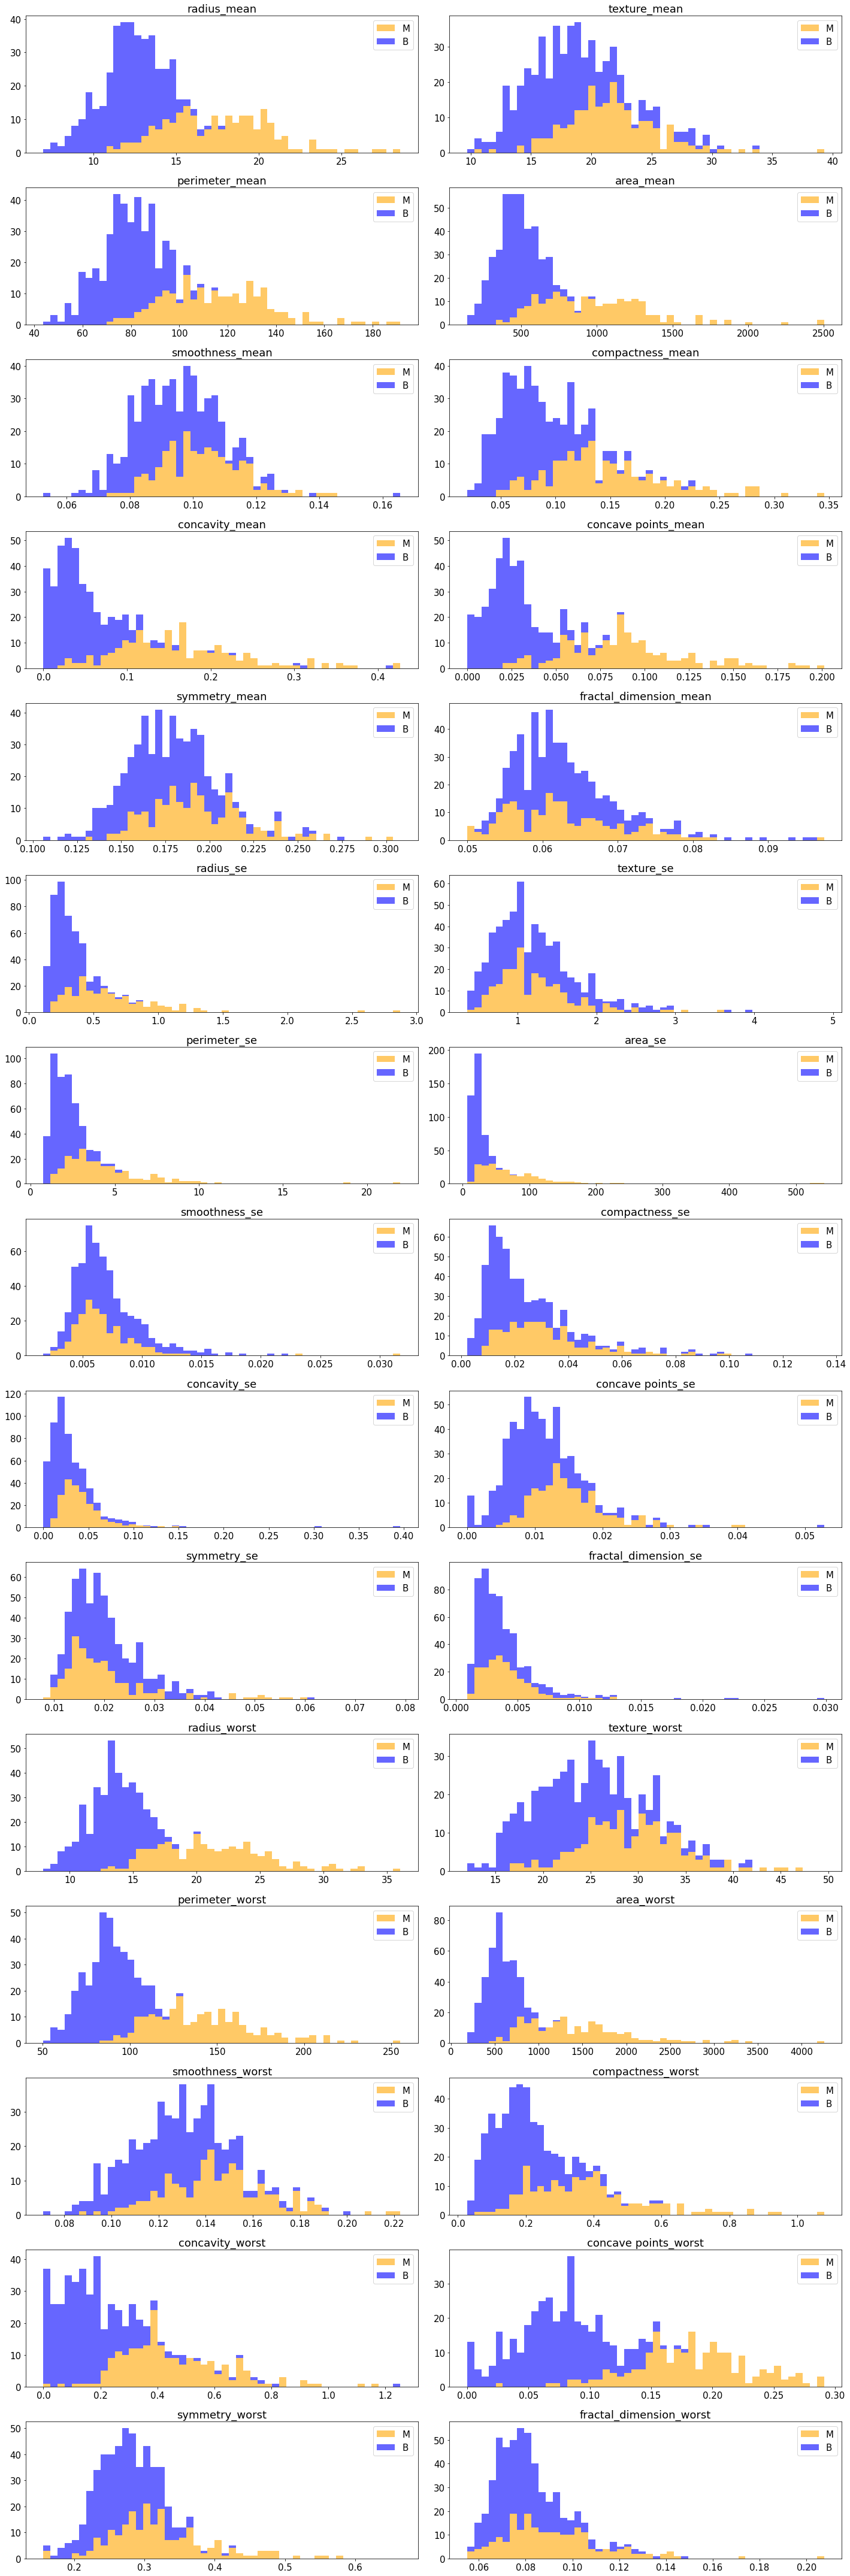

In [37]:
#Stack the data
plt.rcParams.update({'font.size': 15})
fig, axes = plt.subplots(nrows=15, ncols=2, figsize=(20,60))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(df[features[idx]]) - min(df[features[idx]]))/50
    ax.hist([dfM[features[idx]],dfB[features[idx]]], bins=np.arange(min(df[features[idx]]), max(df[features[idx]]) + binwidth, binwidth) , alpha=0.6, stacked=True, label=['M','B'],color=['Orange', 'Blue'])
    ax.legend(loc='upper right')
    ax.set_title(features[idx])
plt.tight_layout()
plt.show()

__Observation__
From the visualization of the histograms of all the features it appears that larger values of the following  variables: radius_mean, perimeter_mean,area_mean, concave points_mean, perimeter_se, area_se, radius_worst, perimeter_worst, area_worst and concave points worst tends to show a correlation with malignant tumors. 

### Bivariate Analysis

In [38]:
y = df['diagnosis']
x = df.drop('diagnosis', axis = 1)

x = (x - x.mean()) / (x.std()) 
df = pd.concat([y, x.iloc[:,0:10]], axis=1)
df = pd.melt(df, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

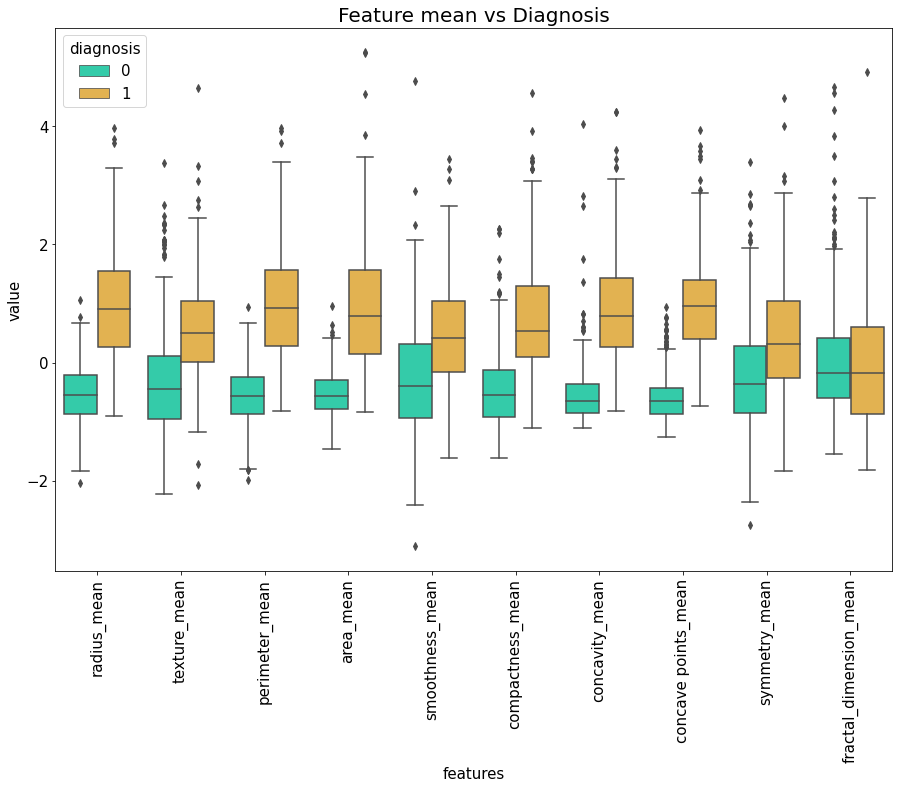

In [16]:
plt.figure(figsize=(15, 10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=df, palette = 'turbo')
plt.title('Feature mean vs Diagnosis', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

In [41]:
radius_mean_m = df['radius_mean'][df['diagnosis'] ==1]
radius_mean_b = df['radius_mean'][df['diagnosis'] ==0]
texture_mean_m = df['texture_mean'][df['diagnosis'] ==1]
texture_mean_b = df['texture_mean'][df['diagnosis'] ==0]
perimeter_mean_m = df['perimeter_mean'][df['diagnosis'] ==1]
perimeter_mean_b = df['perimeter_mean'][df['diagnosis'] ==0]
area_mean_m = df['area_mean'][df['diagnosis'] ==1]
area_mean_b = df['area_mean'][df['diagnosis'] ==0]
smoothness_mean_m = df['smoothness_mean'][df['diagnosis'] ==1]
smoothness_mean_b = df['smoothness_mean'][df['diagnosis'] ==0]
compactness_mean_m = df['compactness_mean'][df['diagnosis'] ==1]
compactness_mean_b = df['compactness_mean'][df['diagnosis'] ==0]
concavity_mean_m = df['concavity_mean'][df['diagnosis'] ==1]
concavity_mean_b = df['concavity_mean'][df['diagnosis'] ==0]
concave_points_mean_m = df['concave points_mean'][df['diagnosis'] ==1]
concave_points_mean_b = df['concave points_mean'][df['diagnosis'] ==0]
symmetry_mean_m = df['symmetry_mean'][df['diagnosis'] ==1]
symmetry_mean_b = df['symmetry_mean'][df['diagnosis'] ==0]
fractal_dimension_mean_m = df['fractal_dimension_mean'][df['diagnosis'] ==1]
fractal_dimension_mean_b = df['fractal_dimension_mean'][df['diagnosis'] ==0]

In [34]:
import scipy.stats as stats
# stats.ttest_ind(malignant, benign )
stats.ttest_ind(radius_mean_m, radius_mean_b, equal_var=True)

Ttest_indResult(statistic=25.435821610057054, pvalue=8.465940572262422e-96)

In [35]:
import scipy.stats as stats
# stats.ttest_ind(malignant, benign )
stats.ttest_ind(texture_mean_m, texture_mean_b, equal_var=True)

Ttest_indResult(statistic=10.86720108146434, pvalue=4.0586360478980736e-25)

In [36]:
import scipy.stats as stats
# stats.ttest_ind(malignant, benign )
stats.ttest_ind(perimeter_mean_m, perimeter_mean_b, equal_var=True)

Ttest_indResult(statistic=26.405212979192665, pvalue=8.43625103617473e-101)

In [37]:
import scipy.stats as stats
# stats.ttest_ind(malignant, benign )
stats.ttest_ind(area_mean_m, area_mean_b, equal_var=True)

Ttest_indResult(statistic=23.938687235690992, pvalue=4.734564310307344e-88)

In [38]:
import scipy.stats as stats
# stats.ttest_ind(malignant, benign )
stats.ttest_ind(smoothness_mean_m, smoothness_mean_b, equal_var=True)

Ttest_indResult(statistic=9.146098808149038, pvalue=1.0518503592032013e-18)

In [39]:
import scipy.stats as stats
# stats.ttest_ind(malignant, benign )
stats.ttest_ind(compactness_mean_m, compactness_mean_b, equal_var=True)

Ttest_indResult(statistic=17.69839197688993, pvalue=3.9382631058873895e-56)

In [40]:
import scipy.stats as stats
# stats.ttest_ind(malignant, benign )
stats.ttest_ind(concavity_mean_m, concavity_mean_b, equal_var=True)

Ttest_indResult(statistic=23.103963430622642, pvalue=9.966555755072963e-84)

In [41]:
import scipy.stats as stats
# stats.ttest_ind(malignant, benign )
stats.ttest_ind(concave_points_mean_m, concave_points_mean_b, equal_var=True)

Ttest_indResult(statistic=29.354318592113618, pvalue=7.101150161057422e-116)

In [42]:
import scipy.stats as stats
# stats.ttest_ind(malignant, benign )
stats.ttest_ind(symmetry_mean_m, symmetry_mean_b, equal_var=True)

Ttest_indResult(statistic=8.338311789592808, pvalue=5.733384028466827e-16)

In [43]:
import scipy.stats as stats
# stats.ttest_ind(malignant, benign )
stats.ttest_ind(fractal_dimension_mean_m, fractal_dimension_mean_b, equal_var=True)

Ttest_indResult(statistic=-0.30571112978583087, pvalue=0.7599368037256238)

In [19]:
df=df_copy.copy()
y = df['diagnosis']
x = df.drop('diagnosis', axis = 1)

x = (x - x.mean()) / (x.std()) 
df = pd.concat([y, x.iloc[:,10:20]], axis=1)
df = pd.melt(df, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

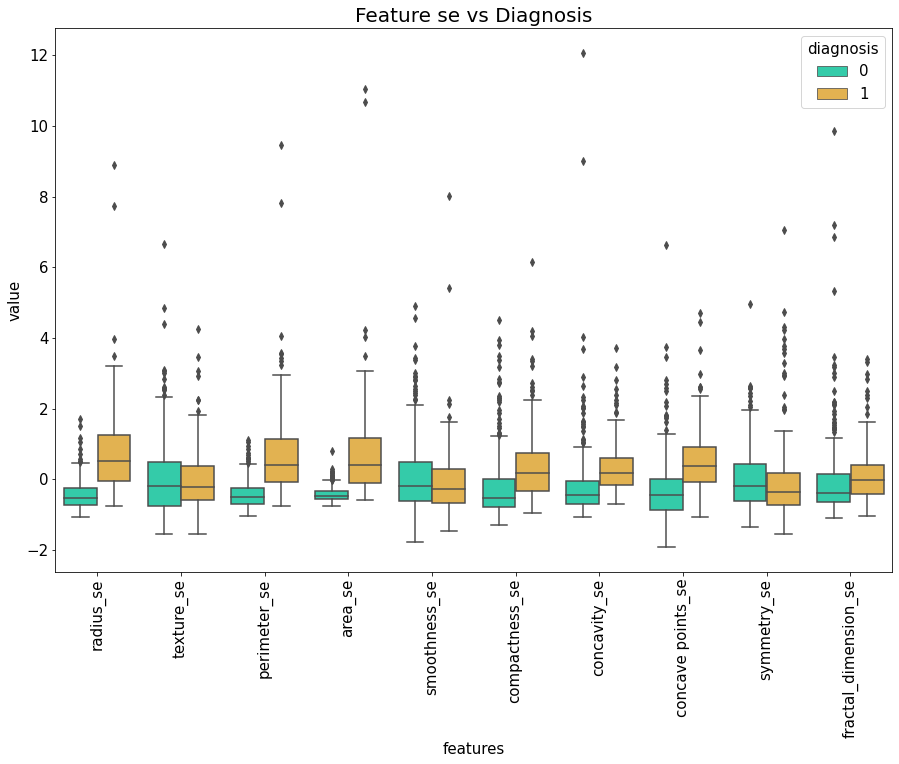

In [28]:
plt.figure(figsize=(15, 10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=df, palette = 'turbo')
plt.title('Feature se vs Diagnosis', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

In [290]:
radius_se_m = df['radius_se'][df['diagnosis'] ==1]
radius_se_b = df['radius_se'][df['diagnosis'] ==0]
texture_se_m = df['texture_se'][df['diagnosis'] ==1]
texture_se_b = df['texture_se'][df['diagnosis'] ==0]
perimeter_se_m = df['perimeter_se'][df['diagnosis'] ==1]
perimeter_se_b = df['perimeter_se'][df['diagnosis'] ==0]
area_se_m = df['area_se'][df['diagnosis'] ==1]
area_se_b = df['area_se'][df['diagnosis'] ==0]
smoothness_se_m = df['smoothness_se'][df['diagnosis'] ==1]
smoothness_se_b = df['smoothness_se'][df['diagnosis'] ==0]
compactness_se_m = df['compactness_se'][df['diagnosis'] ==1]
compactness_se_b = df['compactness_se'][df['diagnosis'] ==0]
concavity_se_m = df['concavity_se'][df['diagnosis'] ==1]
concavity_se_b = df['concavity_se'][df['diagnosis'] ==0]
concave_points_se_m = df['concave points_se'][df['diagnosis'] ==1]
concave_points_se_b = df['concave points_se'][df['diagnosis'] ==0]
symmetry_se_m = df['symmetry_se'][df['diagnosis'] ==1]
symmetry_se_b = df['symmetry_se'][df['diagnosis'] ==0]
fractal_dimension_se_m = df['fractal_dimension_se'][df['diagnosis'] ==1]
fractal_dimension_se_b = df['fractal_dimension_se'][df['diagnosis'] ==0]

In [291]:
import scipy.stats as stats
# stats.ttest_ind(malignant, benign )
stats.ttest_ind(radius_se_m, radius_se_b, equal_var=True)

Ttest_indResult(statistic=16.396351025985748, pvalue=9.738948656461507e-50)

In [292]:
import scipy.stats as stats
# stats.ttest_ind(malignant, benign )
stats.ttest_ind(texture_se_m, texture_se_b, equal_var=True)

Ttest_indResult(statistic=-0.1977238031013334, pvalue=0.8433320287670163)

In [293]:
import scipy.stats as stats
# stats.ttest_ind(malignant, benign )
stats.ttest_ind(perimeter_se_m, perimeter_se_b, equal_var=True)

Ttest_indResult(statistic=15.934158019257902, pvalue=1.6519051758498057e-47)

In [294]:
import scipy.stats as stats
# stats.ttest_ind(malignant, benign )
stats.ttest_ind(area_se_m, area_se_b, equal_var=True)

Ttest_indResult(statistic=15.609342900255001, pvalue=5.8955213926058635e-46)

In [295]:
import scipy.stats as stats
# stats.ttest_ind(malignant, benign )
stats.ttest_ind(smoothness_se_m, smoothness_se_b, equal_var=True)

Ttest_indResult(statistic=-1.599364812413284, pvalue=0.11029660865789295)

In [296]:
import scipy.stats as stats
# stats.ttest_ind(malignant, benign )
stats.ttest_ind(compactness_se_m, compactness_se_b, equal_var=True)

Ttest_indResult(statistic=7.2970774374485305, pvalue=9.975994654074587e-13)

In [297]:
import scipy.stats as stats
# stats.ttest_ind(malignant, benign )
stats.ttest_ind(concavity_se_m, concavity_se_b, equal_var=True)

Ttest_indResult(statistic=6.246157343266937, pvalue=8.260176167970051e-10)

In [298]:
import scipy.stats as stats
# stats.ttest_ind(malignant, benign )
stats.ttest_ind(concave_points_se_m, concave_points_se_b, equal_var=True)

Ttest_indResult(statistic=10.64249782452053, pvalue=3.0723087688180654e-24)

In [299]:
import scipy.stats as stats
# stats.ttest_ind(malignant, benign )
stats.ttest_ind(symmetry_se_m, symmetry_se_b, equal_var=True)

Ttest_indResult(statistic=-0.1552978000059369, pvalue=0.8766418183858812)

In [300]:
import scipy.stats as stats
# stats.ttest_ind(malignant, benign )
stats.ttest_ind(fractal_dimension_se_m, fractal_dimension_se_b, equal_var=True)

Ttest_indResult(statistic=1.862330463973157, pvalue=0.06307355082239346)

In [15]:
df=df_copy.copy()
y = df['diagnosis']
x = df.drop('diagnosis', axis = 1)

x = (x - x.mean()) / (x.std()) 
df = pd.concat([y, x.iloc[:,20:30]], axis=1)
df = pd.melt(df, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

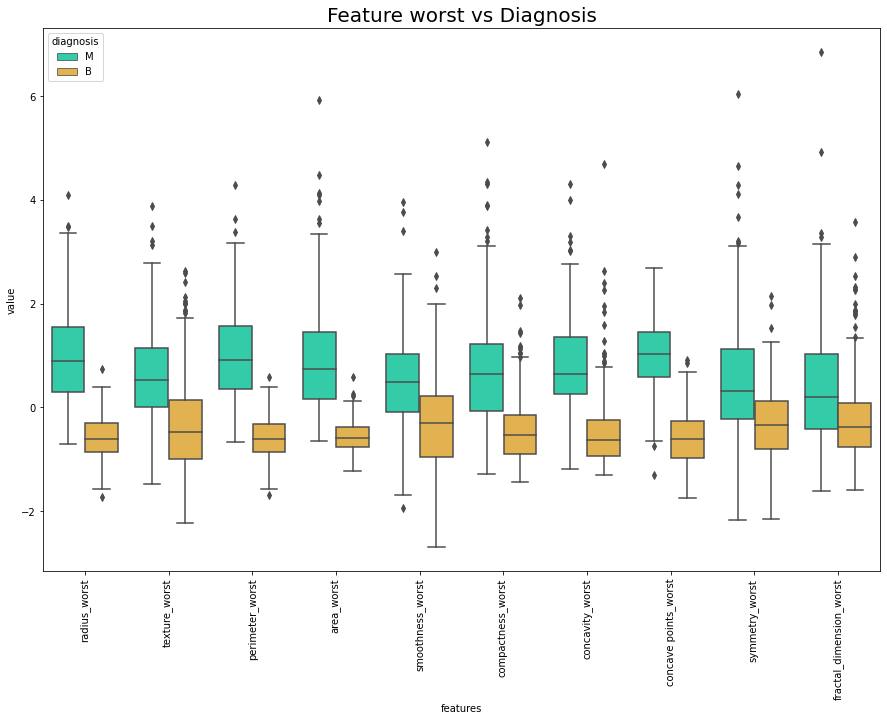

In [16]:
plt.figure(figsize=(15, 10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=df, palette = 'turbo')
plt.title('Feature worst vs Diagnosis', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

In [301]:
radius_worst_m = df['radius_worst'][df['diagnosis'] ==1]
radius_worst_b = df['radius_worst'][df['diagnosis'] ==0]
texture_worst_m = df['texture_worst'][df['diagnosis'] ==1]
texture_worst_b = df['texture_worst'][df['diagnosis'] ==0]
perimeter_worst_m = df['perimeter_worst'][df['diagnosis'] ==1]
perimeter_worst_b = df['perimeter_worst'][df['diagnosis'] ==0]
area_worst_m = df['area_worst'][df['diagnosis'] ==1]
area_worst_b = df['area_worst'][df['diagnosis'] ==0]
smoothness_worst_m = df['smoothness_worst'][df['diagnosis'] ==1]
smoothness_worst_b = df['smoothness_worst'][df['diagnosis'] ==0]
compactness_worst_m = df['compactness_worst'][df['diagnosis'] ==1]
compactness_worst_b = df['compactness_worst'][df['diagnosis'] ==0]
concavity_worst_m = df['concavity_worst'][df['diagnosis'] ==1]
concavity_worst_b = df['concavity_worst'][df['diagnosis'] ==0]
concave_points_worst_m = df['concave points_worst'][df['diagnosis'] ==1]
concave_points_worst_b = df['concave points_worst'][df['diagnosis'] ==0]
symmetry_worst_m = df['symmetry_worst'][df['diagnosis'] ==1]
symmetry_worst_b = df['symmetry_worst'][df['diagnosis'] ==0]
fractal_dimension_worst_m = df['fractal_dimension_worst'][df['diagnosis'] ==1]
fractal_dimension_worst_b = df['fractal_dimension_worst'][df['diagnosis'] ==0]

In [302]:
import scipy.stats as stats
# stats.ttest_ind(malignant, benign )
stats.ttest_ind(radius_worst_m, radius_worst_b, equal_var=True)

Ttest_indResult(statistic=29.33908156342075, pvalue=8.482291921684414e-116)

In [303]:
import scipy.stats as stats
# stats.ttest_ind(malignant, benign )
stats.ttest_ind(texture_worst_m, texture_worst_b, equal_var=True)

Ttest_indResult(statistic=12.23098134599393, pvalue=1.0780574879494241e-30)

In [304]:
import scipy.stats as stats
# stats.ttest_ind(malignant, benign )
stats.ttest_ind(perimeter_worst_m, perimeter_worst_b, equal_var=True)

Ttest_indResult(statistic=29.965717392710303, pvalue=5.771397139668621e-119)

In [305]:
import scipy.stats as stats
# stats.ttest_ind(malignant, benign )
stats.ttest_ind(area_worst_m, area_worst_b, equal_var=True)

Ttest_indResult(statistic=25.721590260589004, pvalue=2.828847704286693e-97)

In [306]:
import scipy.stats as stats
# stats.ttest_ind(malignant, benign )
stats.ttest_ind(smoothness_worst_m, smoothness_worst_b, equal_var=True)

Ttest_indResult(statistic=11.066746606769504, pvalue=6.575143633984769e-26)

In [307]:
import scipy.stats as stats
# stats.ttest_ind(malignant, benign )
stats.ttest_ind(compactness_worst_m, compactness_worst_b, equal_var=True)

Ttest_indResult(statistic=17.445373681975457, pvalue=7.069816352538377e-55)

In [308]:
import scipy.stats as stats
# stats.ttest_ind(malignant, benign )
stats.ttest_ind(concavity_worst_m, concavity_worst_b, equal_var=True)

Ttest_indResult(statistic=20.897175392934134, pvalue=2.4646639567829224e-72)

In [309]:
import scipy.stats as stats
# stats.ttest_ind(malignant, benign )
stats.ttest_ind(concave_points_worst_m, concave_points_worst_b, equal_var=True)

Ttest_indResult(statistic=31.054555115984236, pvalue=1.9690997072164375e-124)

In [310]:
import scipy.stats as stats
# stats.ttest_ind(malignant, benign )
stats.ttest_ind(symmetry_worst_m, symmetry_worst_b, equal_var=True)

Ttest_indResult(statistic=10.902303982929364, pvalue=2.951120577154039e-25)

In [311]:
import scipy.stats as stats
# stats.ttest_ind(malignant, benign )
stats.ttest_ind(fractal_dimension_worst_m, fractal_dimension_worst_b, equal_var=True)

Ttest_indResult(statistic=8.151316497940705, pvalue=2.316432449982829e-15)

__Observation__
Every Box plot includes markers indicating the median and the interquartile (middle 50%) range.  Generally speaking, for the benign mass the median is lower for all features except for smoothness_se, texture_se, symmetry_se, fractal_dimension_mean and fractal_dimension_se, these features are as well not statistical significant according to the Ttest. The p values for the noted features are more than 0.05 so the results in the data are explainable by chance alone, and the data for those features are deemed consistent with the null hypothesis.


## Multivariate Analysis

In [42]:
df=df_copy.copy()
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


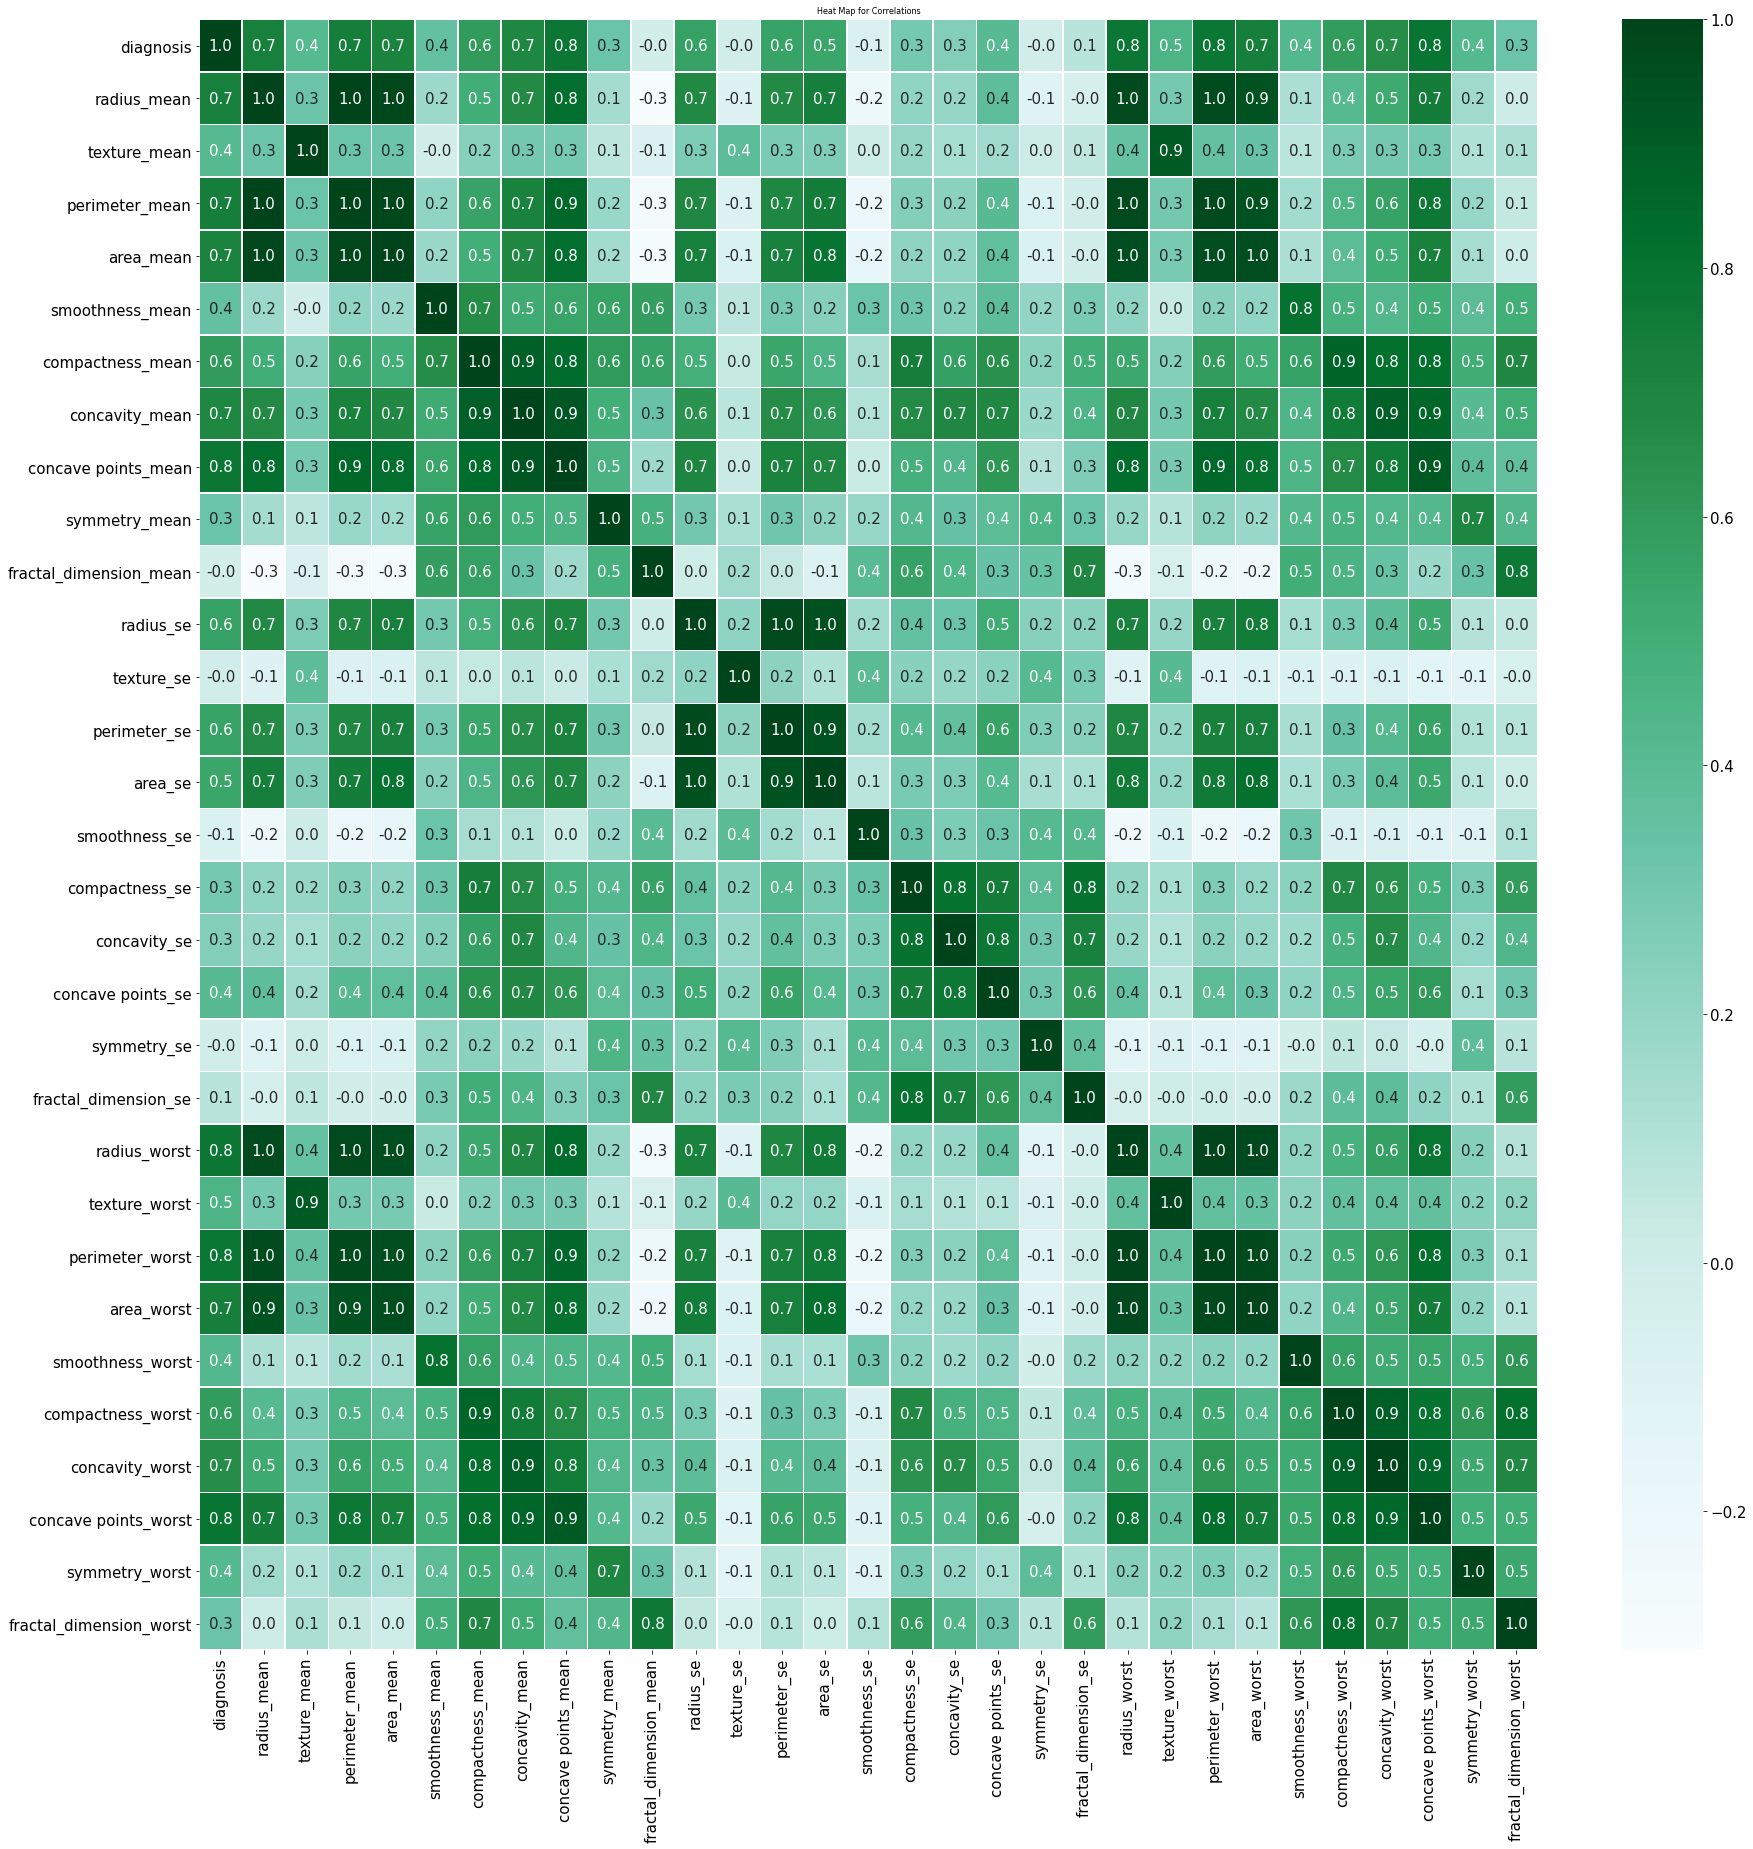

In [43]:
plt.rcParams['figure.figsize'] = (30, 30)

# sns.heatmap(df.corr(), cmap = 'pink', annot = True, linewidths = 0.5, fmt = '.1f')
sns.heatmap(df.corr(), cmap = 'BuGn', annot = True, linewidths = 0.5, fmt = '.1f')
plt.title('Heat Map for Correlations', fontsize = 8)
plt.show()

__Observation__
From the  heatmap, we can see there is a high correlation (value =1.0) between independent features like radius, perimeter, and area. This can be an indication of collinearity.


In [44]:
corr = df.corr()
corr[abs(corr['diagnosis']) > 0.5].index

Index(['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'radius_se', 'perimeter_se', 'area_se', 'radius_worst',
       'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')

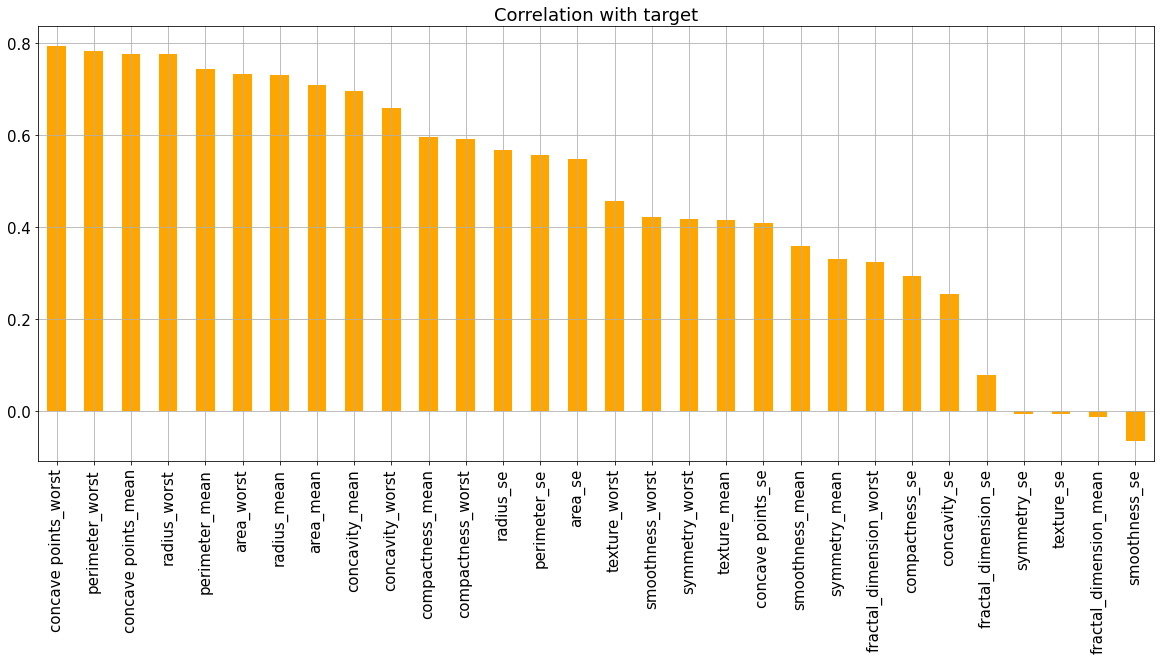

In [45]:
correl=df.drop('diagnosis', axis=1).corrwith(df.diagnosis)
df_c = correl.sort_values(ascending=False)
df_c.plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with target",color="Orange");

__Observation__
There are strong positive linear relationships between malignancy and radius of nuclear, number of concave points, perimeter and area. 

In [46]:
corr_matrix = df.corr()
threshold = 0.70 
filtre = np.abs(corr_matrix["diagnosis"]) > threshold
corr_features = corr_matrix.columns[filtre].tolist()

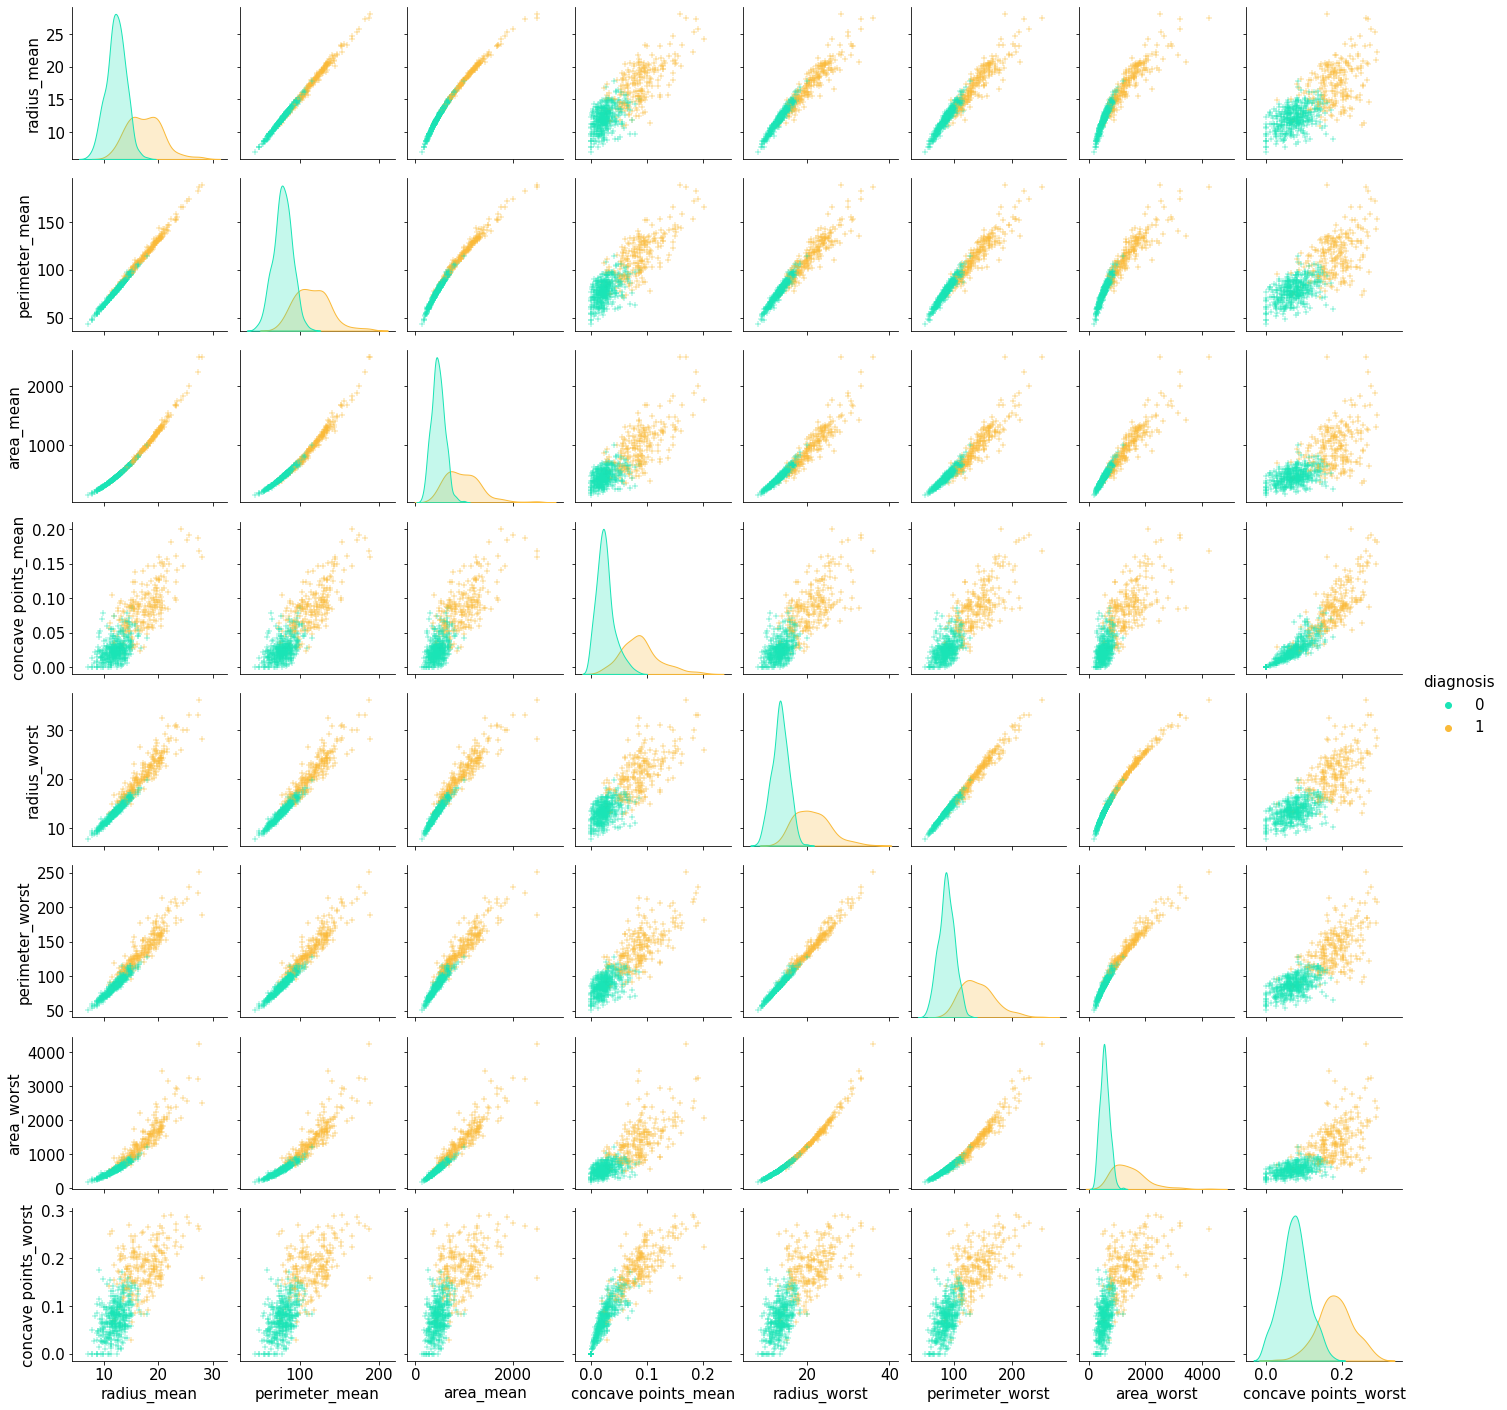

In [47]:
#pair plot
sns.pairplot(df[corr_features], diag_kind = "kde", markers = "+", hue = "diagnosis", palette ="turbo")
plt.show()

__Analysis of the effect of the features on the Target__

For this analysis we are testing the final selected features without scaling

In [48]:
# importing libraries
import statsmodels.api as sm
import pandas as pd 

In [49]:
# defining the dependent and independent variables
Xtrain_5v = df[['perimeter_worst','smoothness_worst','area_se','concave points_worst', 
                           'texture_mean']]
ytrain_5v = df[['diagnosis']]

In [50]:
# building the model and fitting the data
Xtrain_5v=sm.add_constant(Xtrain_5v)
log_reg_no_scale = sm.Logit(ytrain_5v, Xtrain_5v).fit()

Optimization terminated successfully.
         Current function value: 0.076685
         Iterations 11


In [51]:
# printing the summary table
print(log_reg_no_scale.summary())

                           Logit Regression Results                           
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      563
Method:                           MLE   Df Model:                            5
Date:                Sat, 16 Oct 2021   Pseudo R-squ.:                  0.8839
Time:                        17:33:47   Log-Likelihood:                -43.634
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                2.736e-141
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -39.9857      6.212     -6.437      0.000     -52.161     -27.811
perimeter_worst          0.1575      0.035      4.523      0.000       0.089       0.226
smoothness_w

__Observation__
The values of the coefficients are very high with might indicate the necessity of scaling

__Scaling the Data__

Due to the variation in magnitude ranges of the variables, a standardization method was needed. For this process, a Robust Scaler algorithm was used. The Robust Scaler uses a similar method to the Min-Max scaler. It uses interquartile ranges rather than the min-max values, so that it is robust to outliers.



In [52]:
df_all_scaled = df.copy()

column = ["diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean",
         "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave points_se", "symmetry_se", "fractal_dimension_se",
         "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst", "fractal_dimension_worst"]
features_all = df_all_scaled[column]
features_all.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [53]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

df_all_scaled[column] = scaler.fit_transform(features_all.values)
df_all_rscaled=df_all_scaled[column]

In [39]:
df_all_rscaled.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1.0,1.132353,-1.502664,1.263740,1.241446,1.190174,2.824832,2.358711,2.115850,1.855030,...,1.801038,-0.935185,2.105595,2.343063,1.051020,2.364252,1.807750,1.715248,2.635556,1.884578
842517,1.0,1.764706,-0.190053,1.612859,2.138245,-0.587956,-0.213653,0.250742,0.682995,0.059172,...,1.733564,-0.231481,1.480746,2.232284,-0.255102,-0.131839,0.055514,0.892194,-0.106667,0.435500
84300903,1.0,1.549020,0.428064,1.512617,1.798841,0.725304,1.027337,1.343287,1.758242,0.819527,...,1.487889,0.013889,1.328167,1.797960,0.445578,1.107869,0.833458,1.483052,1.171852,0.365664
84348301,1.0,-0.477941,0.273535,-0.299343,-0.455298,2.463286,2.921045,1.778327,1.335444,2.381657,...,-0.010381,0.126157,0.029305,-0.208897,2.670068,3.410109,1.714605,1.633358,5.653333,4.508244
84358402,1.0,1.696078,-0.799290,1.688904,2.058223,0.234020,0.613470,1.349219,1.318681,0.050296,...,1.309689,-1.011574,1.320901,1.562335,0.207483,-0.035956,0.645678,0.648595,-0.678519,-0.158099


__Analysis of the effect of the features on the Target with scaling__

For this analysis we are testing the final selected features with and with scaling

In [54]:
# defining the dependent and independent variables
Xtrain_5vs = df_all_rscaled[['perimeter_worst','smoothness_worst','area_se','concave points_worst', 
                           'texture_mean']]
ytrain_5vs = df_all_rscaled[['diagnosis']]

In [55]:
# building the model and fitting the data
Xtrain_5vs=sm.add_constant(Xtrain_5vs)
log_reg_rscale = sm.Logit(ytrain_5vs, Xtrain_5vs).fit()

Optimization terminated successfully.
         Current function value: 0.076685
         Iterations 11


In [57]:
# printing the summary table
print(log_reg_rscale.summary())

                           Logit Regression Results                           
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      563
Method:                           MLE   Df Model:                            5
Date:                Sat, 16 Oct 2021   Pseudo R-squ.:                  0.8839
Time:                        17:34:57   Log-Likelihood:                -43.634
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                2.736e-141
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.6818      0.548     -6.714      0.000      -4.757      -2.607
perimeter_worst          6.5041      1.438      4.523      0.000       3.686       9.323
smoothness_w

In [58]:
import pandas as pd

logreg = {'feature_er': ['perimeter_worst','smoothness_worst','area_se','concave points_worst', 
                           'texture_mean'],
            'std_error': [2.8181, 1.1129, 1.1579, 2.4564, 0.8987], 
          'coef': [6.5041, 1.8509, 2.3079, 3.3854, 2.1147]} 


dfer = pd.DataFrame(logreg, columns = ['feature_er', 'std_error', 'coef'])

print (dfer)

             feature_er  std_error    coef
0       perimeter_worst     2.8181  6.5041
1      smoothness_worst     1.1129  1.8509
2               area_se     1.1579  2.3079
3  concave points_worst     2.4564  3.3854
4          texture_mean     0.8987  2.1147


In [59]:
import numpy as np
x_pos = np.arange(len(logreg['feature_er']))
height = dfer['coef']
error = dfer['std_error']
print(error)

0    2.8181
1    1.1129
2    1.1579
3    2.4564
4    0.8987
Name: std_error, dtype: float64


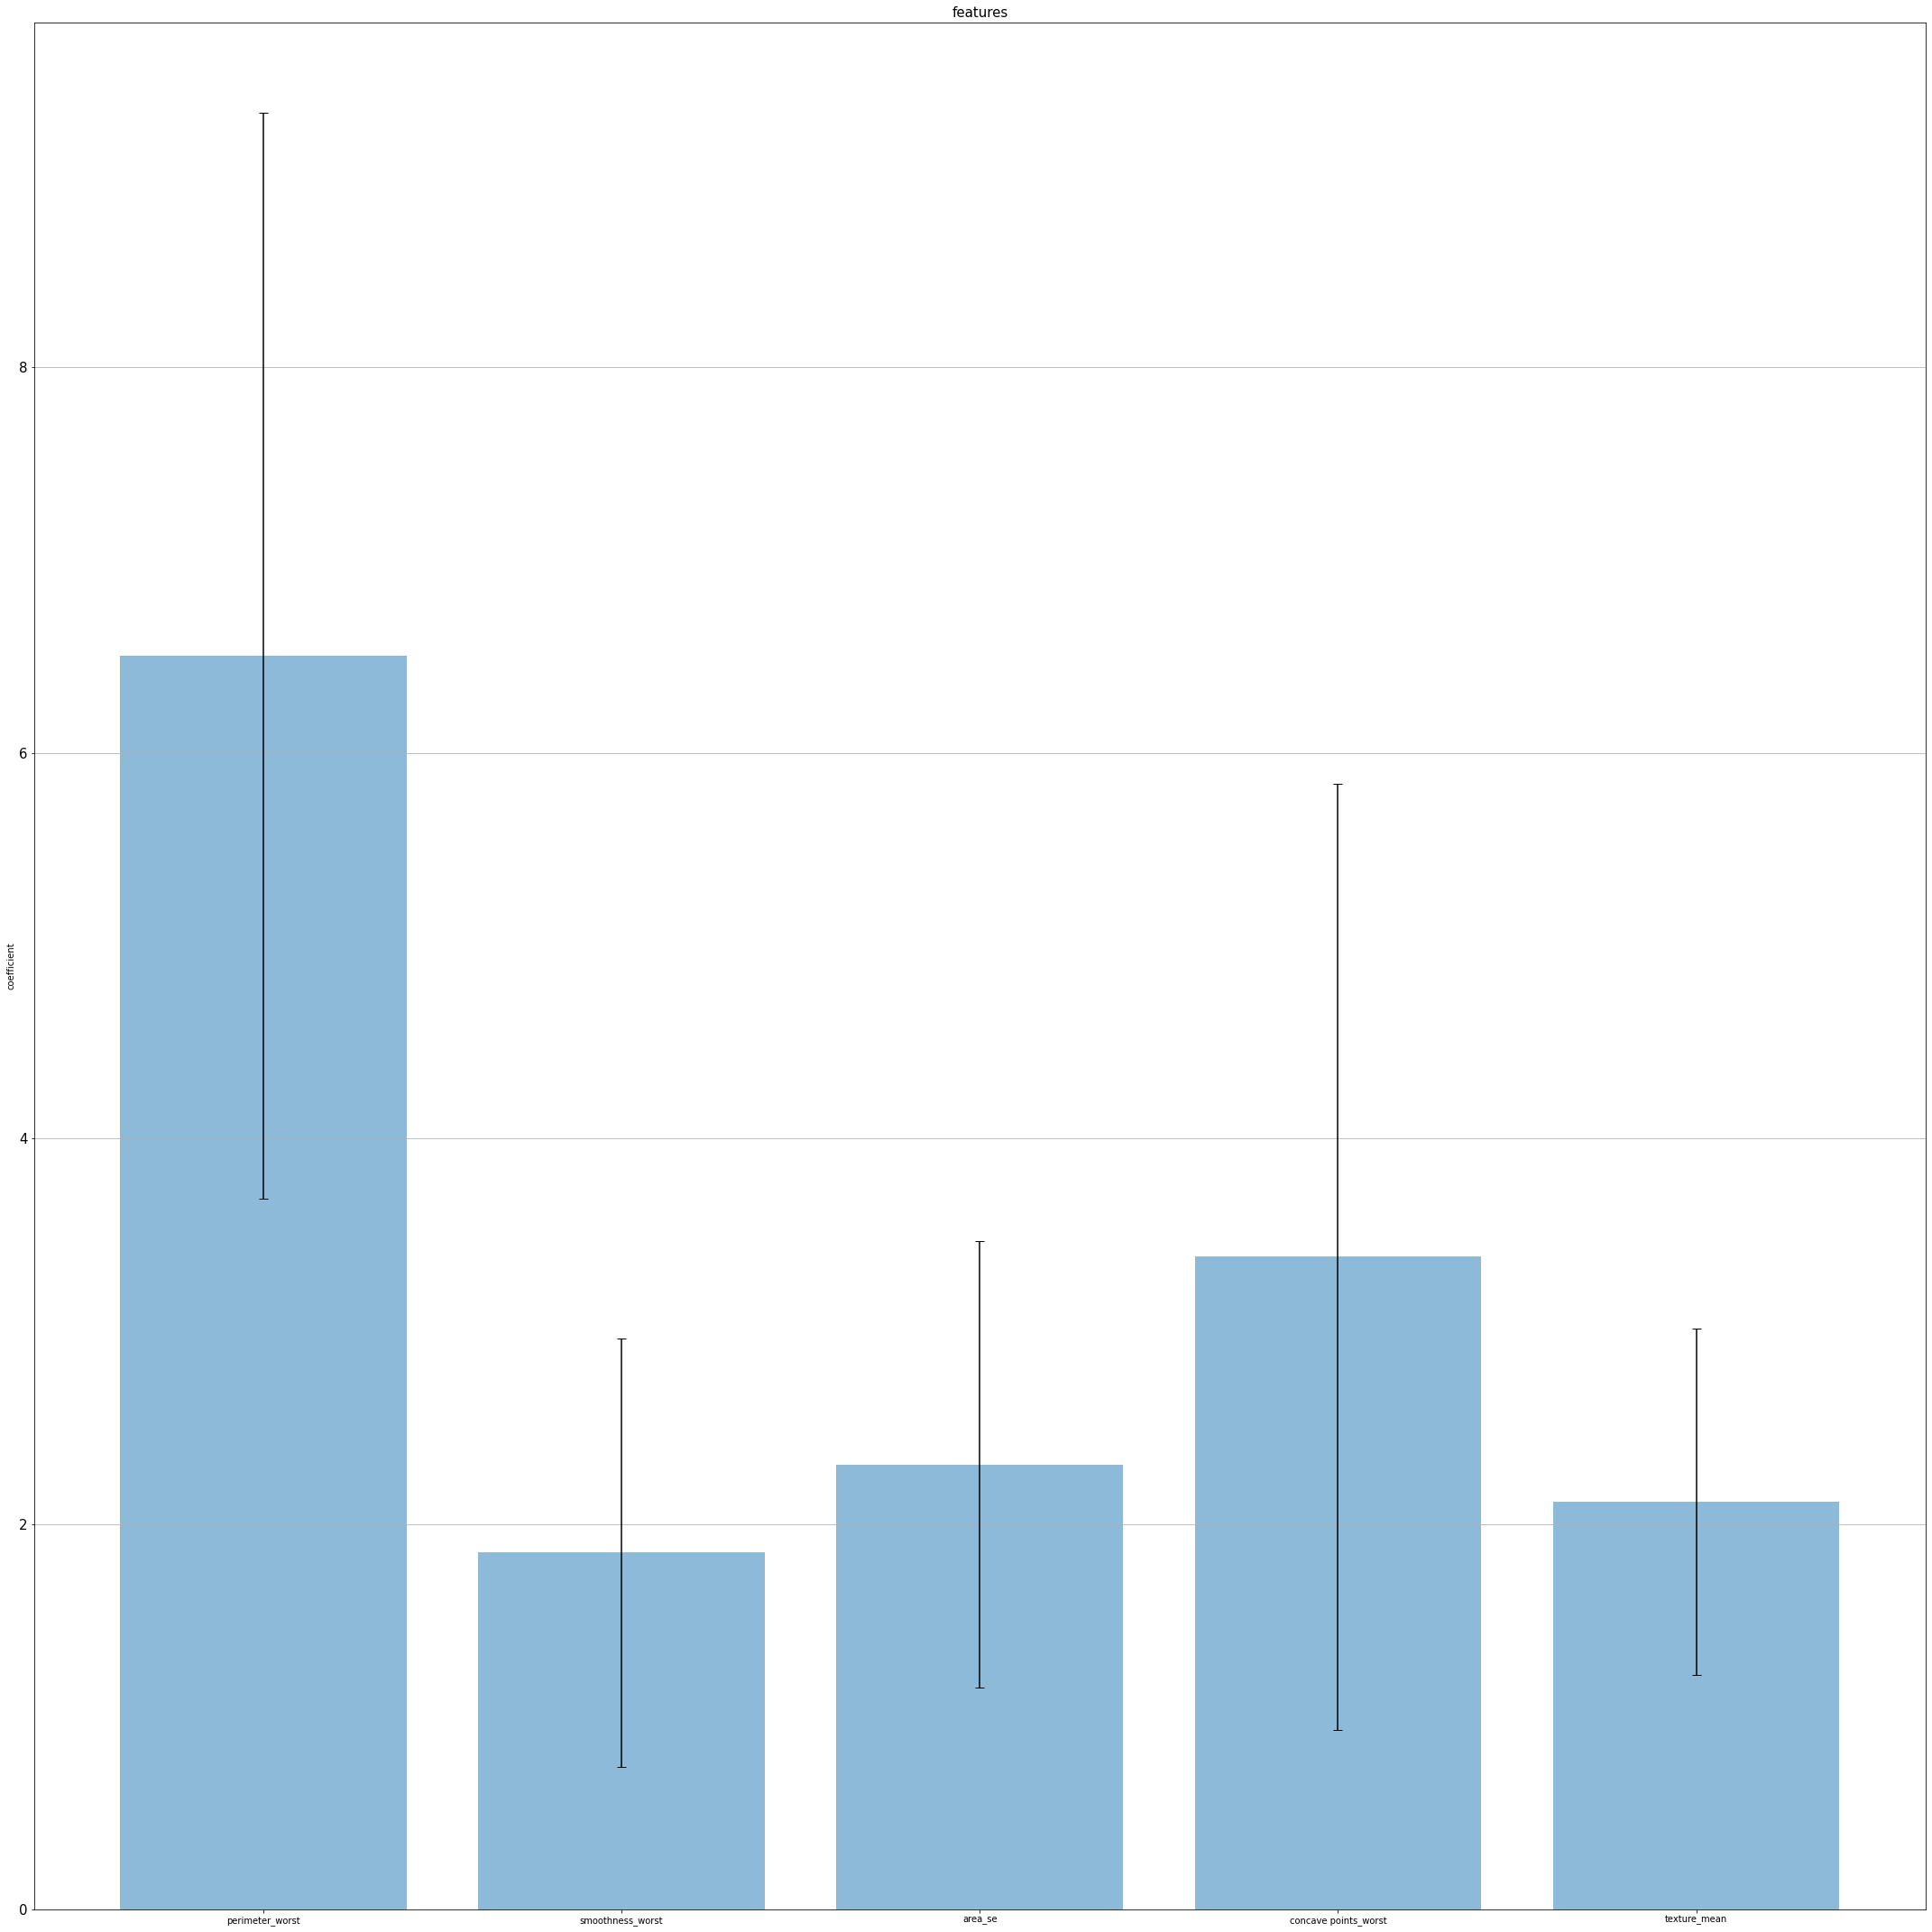

In [60]:
# Build the plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# ax.bar(x_pos, height=height, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=5)
ax.bar(x_pos, height=height, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=5)
ax.set_ylabel('coefficient', fontsize=10)
ax.set_xticks(x_pos)
ax.set_xticklabels(dfer.feature_er, fontsize=10)
ax.set_title('features', fontsize=15)
ax.yaxis.grid(True)
# plt.rcParams['figure.figsize'] = [10,10]
# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

__Observation__

B is the coefficient where e^B is the odds ratio.
In our case, because our units are in pixels is not very intuitive.
In any case for perimeter worst the odds ratio=665, for smoothness_worst=6.68, area_se=9.9, concave points worst=29.38, texture_mean=8.24
all the odds ratio of the selected features increase the probability for cancer tumor for 1 unit increase (for area/perimeter that means 1 extra pixel on average per cell nucleus)  


__Multicollinearity__

Multicollinearity occurs when independent variables in a regression model are correlated. This correlation is a problem because independent variables should be independent. If the degree of correlation between variables is high enough, it can cause problems when we fit the model and interpret the results.
Having in mind that if we think of a cell as roughly taking a form of a circle, and that area and perimeter are defined by the radius (circle area= πr^2, circle perimeter = 2πr) Therefore features that refers to size as perimeter, radius and area have a high variance inflation factor because the three columns essentially contain the same information.

The Multicollinearity was detected via Variance inflation factors (VIF).
The VIF method determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable.
A VIF > 10 is an indicator of multicollinearity, so we calculated the VIF for the selected features and removing one by one until our VIF was smaller than 10



In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
  
# the independent variables set
X = df_all_rscaled[column]
 
# VIF dataframe
vif_all_rscaled = pd.DataFrame()
vif_all_rscaled["feature"] = X.columns
  
# calculating VIF for each feature
def calc_vif(X):
    X=sm.add_constant(X)
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
df_all_rscaled.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1.0,1.132353,-1.502664,1.263740,1.241446,1.190174,2.824832,2.358711,2.115850,1.855030,...,1.801038,-0.935185,2.105595,2.343063,1.051020,2.364252,1.807750,1.715248,2.635556,1.884578
842517,1.0,1.764706,-0.190053,1.612859,2.138245,-0.587956,-0.213653,0.250742,0.682995,0.059172,...,1.733564,-0.231481,1.480746,2.232284,-0.255102,-0.131839,0.055514,0.892194,-0.106667,0.435500
84300903,1.0,1.549020,0.428064,1.512617,1.798841,0.725304,1.027337,1.343287,1.758242,0.819527,...,1.487889,0.013889,1.328167,1.797960,0.445578,1.107869,0.833458,1.483052,1.171852,0.365664
84348301,1.0,-0.477941,0.273535,-0.299343,-0.455298,2.463286,2.921045,1.778327,1.335444,2.381657,...,-0.010381,0.126157,0.029305,-0.208897,2.670068,3.410109,1.714605,1.633358,5.653333,4.508244
84358402,1.0,1.696078,-0.799290,1.688904,2.058223,0.234020,0.613470,1.349219,1.318681,0.050296,...,1.309689,-1.011574,1.320901,1.562335,0.207483,-0.035956,0.645678,0.648595,-0.678519,-0.158099


In [62]:
# X = df_rscaled.iloc[:,:-1]
# X_all = df_all_rscaled.iloc[:,:]
v=round(calc_vif(X),2)
v_sorted = v.sort_values(by='VIF', ascending=False) 
print(v_sorted)

                  variables      VIF
2               radius_mean  3817.26
4            perimeter_mean  3792.70
22             radius_worst   815.95
24          perimeter_worst   405.15
5                 area_mean   348.12
25               area_worst   343.49
12                radius_se    75.74
8            concavity_mean    71.00
14             perimeter_se    70.40
9       concave points_mean    60.17
7          compactness_mean    51.45
15                  area_se    41.20
27        compactness_worst    36.98
29     concave points_worst    36.78
28          concavity_worst    32.09
31  fractal_dimension_worst    18.98
23            texture_worst    18.61
18             concavity_se    15.91
11   fractal_dimension_mean    15.76
17           compactness_se    15.37
3              texture_mean    11.89
19        concave points_se    11.60
26         smoothness_worst    10.93
21     fractal_dimension_se     9.72
30           symmetry_worst     9.54
6           smoothness_mean     8.19
2


Several Features selected based on the VIF analysis and feature importance the following 5 features showed good results.


In [63]:
X_5= df_all_rscaled[['perimeter_worst','smoothness_worst','area_se','concave points_worst', 
                           'texture_mean']]
v5=round(calc_vif(X_5),2)
v5_sorted = v5.sort_values(by='VIF', ascending=False) 
print(v5_sorted)

              variables   VIF
1       perimeter_worst  6.38
4  concave points_worst  5.23
3               area_se  2.51
2      smoothness_worst  1.77
5          texture_mean  1.15
0                 const  1.12


## Feature Importance and Modeling

__Feature Importance__

For the dimension reduction and feature selection, the Random Forest algorithm was used. The
Random Forest algorithm creates a feature importance attribute that outputs an array containing a value
between 0 and 100 for each feature that analyzes whether the features used for training helped in
predicting the target and by how much.
For this analysis, I excluded the features that were not statistically significant. I tested 5 models
that included ALL features, 20, 10 and 5 features where the predictors were selected based on feature
importance solely. An additional set of 5 (I called 5v) features was tested. This set was selected based on
VIF in conjunction with feature importance.
For each set of features (ALL, 20, 10, 5 and 5v), the Random Forest model was run and the
ROC_AUC score was calculated to determine which set of features were the best for the final modeling.



__ALL Features Random Forest Feature Importance__

In [44]:
# Let's load the packages
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt

In [45]:
Xtrain_all = df_all_rscaled[["radius_mean", "texture_mean", "perimeter_mean", "area_mean", 
                             "smoothness_mean", "compactness_mean", "concavity_mean", 
                             "concave points_mean", "symmetry_mean", "radius_se", 
                             "perimeter_se", "area_se",  "compactness_se", "concavity_se", 
                             "concave points_se", "radius_worst", "texture_worst", "perimeter_worst", 
                             "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", 
                             "concave points_worst", "symmetry_worst", "fractal_dimension_worst"]]

In [46]:
Xtrain_all=sm.add_constant(Xtrain_all)

In [47]:
X_all = df_all_rscaled[["radius_mean", "texture_mean", "perimeter_mean", "area_mean", 
                             "smoothness_mean", "compactness_mean", "concavity_mean", 
                             "concave points_mean", "symmetry_mean", "radius_se", 
                             "perimeter_se", "area_se",  "compactness_se", "concavity_se", 
                             "concave points_se", "radius_worst", "texture_worst", "perimeter_worst", 
                             "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", 
                             "concave points_worst", "symmetry_worst", "fractal_dimension_worst"]]
y_all= df_all_rscaled[['diagnosis']]
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.25, random_state=42)

In [48]:
rf_all = RandomForestRegressor(n_estimators=100)
# rf.fit(X_train, y_train)
rf_all.fit(X_train_all, y_train_all.values.ravel())
# model = forest.fit(train_fold, train_y.values.ravel())

RandomForestRegressor()

In [49]:
# To get the feature importances from the Random Forest model use the feature_importances_ attribute:
rf_all.feature_importances_

array([0.00211414, 0.02652291, 0.00217265, 0.00558137, 0.00287845,
       0.001938  , 0.00390028, 0.25077441, 0.00274894, 0.0109606 ,
       0.00179117, 0.01539712, 0.00428052, 0.00691114, 0.00213904,
       0.05788121, 0.02667168, 0.12611141, 0.11863204, 0.00945312,
       0.00204622, 0.01752988, 0.29080748, 0.00765729, 0.00309893])

In [51]:
feature_names_all = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean", 
                             "smoothness_mean", "compactness_mean", "concavity_mean", 
                             "concave points_mean", "symmetry_mean", "radius_se", 
                             "perimeter_se", "area_se",  "compactness_se", "concavity_se", 
                             "concave points_se", "radius_worst", "texture_worst", "perimeter_worst", 
                             "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", 
                             "concave points_worst", "symmetry_worst", "fractal_dimension_worst"]
list_of_tuples = list(zip(feature_names_all, rf_all.feature_importances_))
   
# Assign data to tuples.
list_of_tuples 
 
 
# Converting lists of tuples into
# pandas Dataframe.
df_fim_all = pd.DataFrame(list_of_tuples,
                  columns = ['feature_names_all', 'rf_all_feature_importances_'])
df_fim_all.sort_values(by=['rf_all_feature_importances_'], inplace=True, ascending=False)   
# Print data.
print(df_fim_all)

          feature_names_all  rf_all_feature_importances_
22     concave points_worst                     0.290807
7       concave points_mean                     0.250774
17          perimeter_worst                     0.126111
18               area_worst                     0.118632
15             radius_worst                     0.057881
16            texture_worst                     0.026672
1              texture_mean                     0.026523
21          concavity_worst                     0.017530
11                  area_se                     0.015397
9                 radius_se                     0.010961
19         smoothness_worst                     0.009453
23           symmetry_worst                     0.007657
13             concavity_se                     0.006911
3                 area_mean                     0.005581
12           compactness_se                     0.004281
6            concavity_mean                     0.003900
24  fractal_dimension_worst    

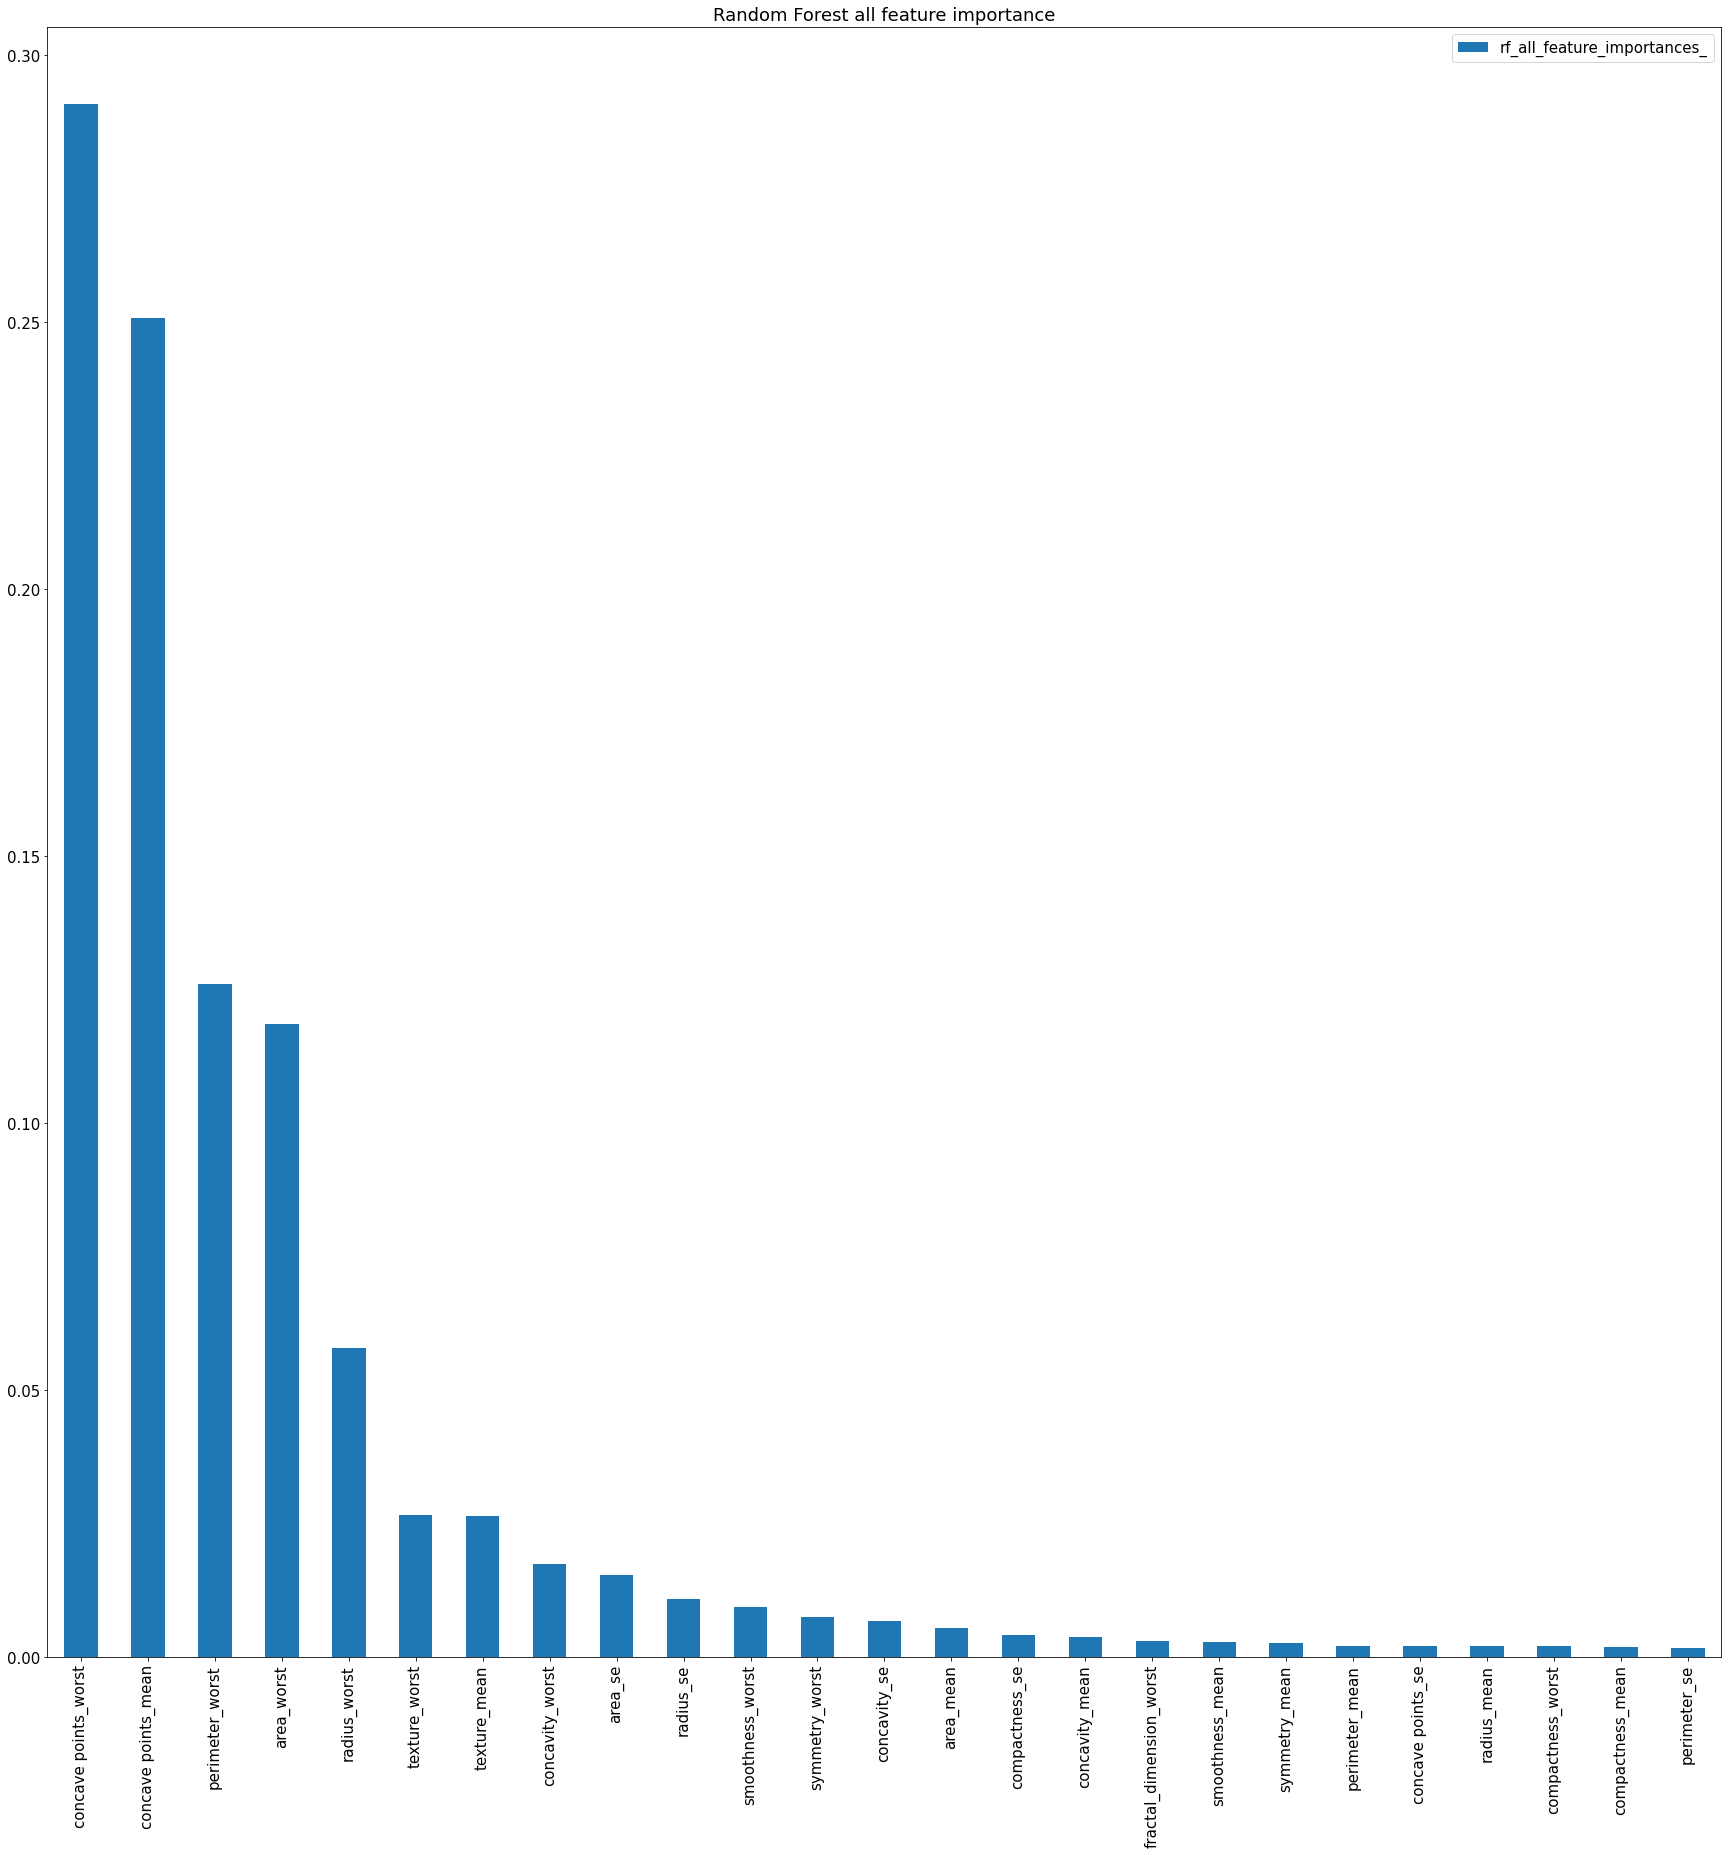

In [52]:
ax = df_fim_all[['feature_names_all','rf_all_feature_importances_']].sort_values(by='rf_all_feature_importances_',ascending=False).plot(kind='bar')
ax.set_title('Random Forest all feature importance')
ax.set_xticklabels(df_fim_all.feature_names_all);

__ALL Features Random Forest Best Parameters__

In [76]:
X_all = df_all_rscaled[["radius_mean", "texture_mean", "perimeter_mean", "area_mean", 
                             "smoothness_mean", "compactness_mean", "concavity_mean", 
                             "concave points_mean", "symmetry_mean", "radius_se", 
                             "perimeter_se", "area_se",  "compactness_se", "concavity_se", 
                             "concave points_se", "radius_worst", "texture_worst", "perimeter_worst", 
                             "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", 
                             "concave points_worst", "symmetry_worst", "fractal_dimension_worst"]]
y_all = df_all_rscaled[['diagnosis']]
X_all=sm.add_constant(X_all)

In [77]:
# Split the data into training and testing sets
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y_all, test_size = 0.30, random_state = 42)
#Instantiate the model
rfm_all = RandomForestClassifier()
#Tuning parameters and performing cross-validation
# Setup the hyperparameter grid
#number of trees in Forest
n_estimators = np.arange(1,50)
max_depth = np.arange(1,8)
param_grid = {'n_estimators': n_estimators, 'max_depth':max_depth}
# Instantiate the GridSearchCV object: rf_cv
rf_cv_all = GridSearchCV(rfm_all, param_grid, cv=5, scoring='roc_auc')

#Fitting the model
rf_cv_all.fit(X_all_train, y_all_train.values.ravel())

print("Tuned Random Forest Parameters: {}".format(rf_cv_all.best_params_)) 
print("Best score is all features{}".format(rf_cv_all.best_score_))

Tuned Random Forest Parameters: {'max_depth': 4, 'n_estimators': 8}
Best score is all features0.9900960825709595


__All Features Random Forest Model ROC_AUC score__

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, brier_score_loss, roc_curve, auc
#Instantiate the model with best parameters acquired from GridCV Search
rfm_all = RandomForestClassifier(max_depth=4, n_estimators=8, random_state = 42)
#Fitting the model
rfm_all.fit(X_all_train, y_all_train.values.ravel())


# Scoring with AUC
print('ROC AUC score All Features:', roc_auc_score(y_all_test, rfm_all.predict_proba(X_all_test)[:,1]))

# calculate brier score
brier_loss = brier_score_loss(y_all_test, rfm_all.predict_proba(X_all_test)[:, 1])
print("Brier score is all features {}".format(brier_loss))

rf_fpr_all, rf_tpr_all, _ = roc_curve(y_all_test, rfm_all.predict_proba(X_all_test)[:, 1])

ROC AUC score All Features: 0.9967666078777191
Brier score is all features 0.023232195835219096


__20 Random Forest Feature Importance__

In [65]:
Xtrain_20 = df_all_rscaled[['concave points_worst','concave points_mean', 'perimeter_worst', 'area_worst', 'radius_worst',
'texture_worst', 'texture_mean','concavity_worst', 'area_se', 'smoothness_worst', 'radius_se', 'concavity_se', 
'area_mean', 'perimeter_se', 'concavity_mean','symmetry_worst', 'smoothness_mean', 'radius_mean', 
'symmetry_mean', 'fractal_dimension_worst']]
ytrain_20= df_all_rscaled[['diagnosis']]

In [66]:
Xtrain_20=sm.add_constant(Xtrain_20)

In [67]:
X_20 = df_all_rscaled[['concave points_worst','concave points_mean', 'perimeter_worst', 'area_worst', 'radius_worst',
'texture_worst', 'texture_mean','concavity_worst', 'area_se', 'smoothness_worst', 'radius_se', 'concavity_se', 
'area_mean', 'perimeter_se', 'concavity_mean','symmetry_worst', 'smoothness_mean', 'radius_mean', 
'symmetry_mean', 'fractal_dimension_worst']]
y_20= df_all_rscaled[['diagnosis']]
Xtrain_20, Xtest_20, ytrain_20, ytest_20 = train_test_split(X_20, y_20, test_size=0.25, random_state=42)

In [68]:
rf_20 = RandomForestRegressor(n_estimators=100)
# rf.fit(X_train, y_train)
rf_20.fit(Xtrain_20, ytrain_20.values.ravel())
# model = forest.fit(train_fold, train_y.values.ravel())

RandomForestRegressor()

In [69]:
rf_20.feature_importances_

array([0.20219617, 0.34018014, 0.12082157, 0.10934415, 0.08078715,
       0.02745197, 0.02656082, 0.02236235, 0.01245156, 0.01017079,
       0.00663251, 0.00762695, 0.00755128, 0.00392734, 0.00318883,
       0.0041137 , 0.00527804, 0.00190254, 0.00374503, 0.0037071 ])

In [70]:
feature_names_20 = ['concave points_worst','concave points_mean', 'perimeter_worst', 'area_worst', 'radius_worst',
'texture_worst', 'texture_mean','concavity_worst', 'area_se', 'smoothness_worst', 'radius_se', 'concavity_se', 
'area_mean', 'perimeter_se', 'concavity_mean','symmetry_worst', 'smoothness_mean', 'radius_mean', 
'symmetry_mean', 'fractal_dimension_worst']
list_of_tuples = list(zip(feature_names_20, rf_20.feature_importances_))
   
# Assign data to tuples.
list_of_tuples 
 
 
# Converting lists of tuples into
# pandas Dataframe.
df_fim_20 = pd.DataFrame(list_of_tuples,
                  columns = ['feature_names_20', 'rf_20_feature_importances_'])
df_fim_20.sort_values(by=['rf_20_feature_importances_'], inplace=True, ascending=False)   
# Print data.
print(df_fim_20)

           feature_names_20  rf_20_feature_importances_
1       concave points_mean                    0.340180
0      concave points_worst                    0.202196
2           perimeter_worst                    0.120822
3                area_worst                    0.109344
4              radius_worst                    0.080787
5             texture_worst                    0.027452
6              texture_mean                    0.026561
7           concavity_worst                    0.022362
8                   area_se                    0.012452
9          smoothness_worst                    0.010171
11             concavity_se                    0.007627
12                area_mean                    0.007551
10                radius_se                    0.006633
16          smoothness_mean                    0.005278
15           symmetry_worst                    0.004114
13             perimeter_se                    0.003927
18            symmetry_mean                    0

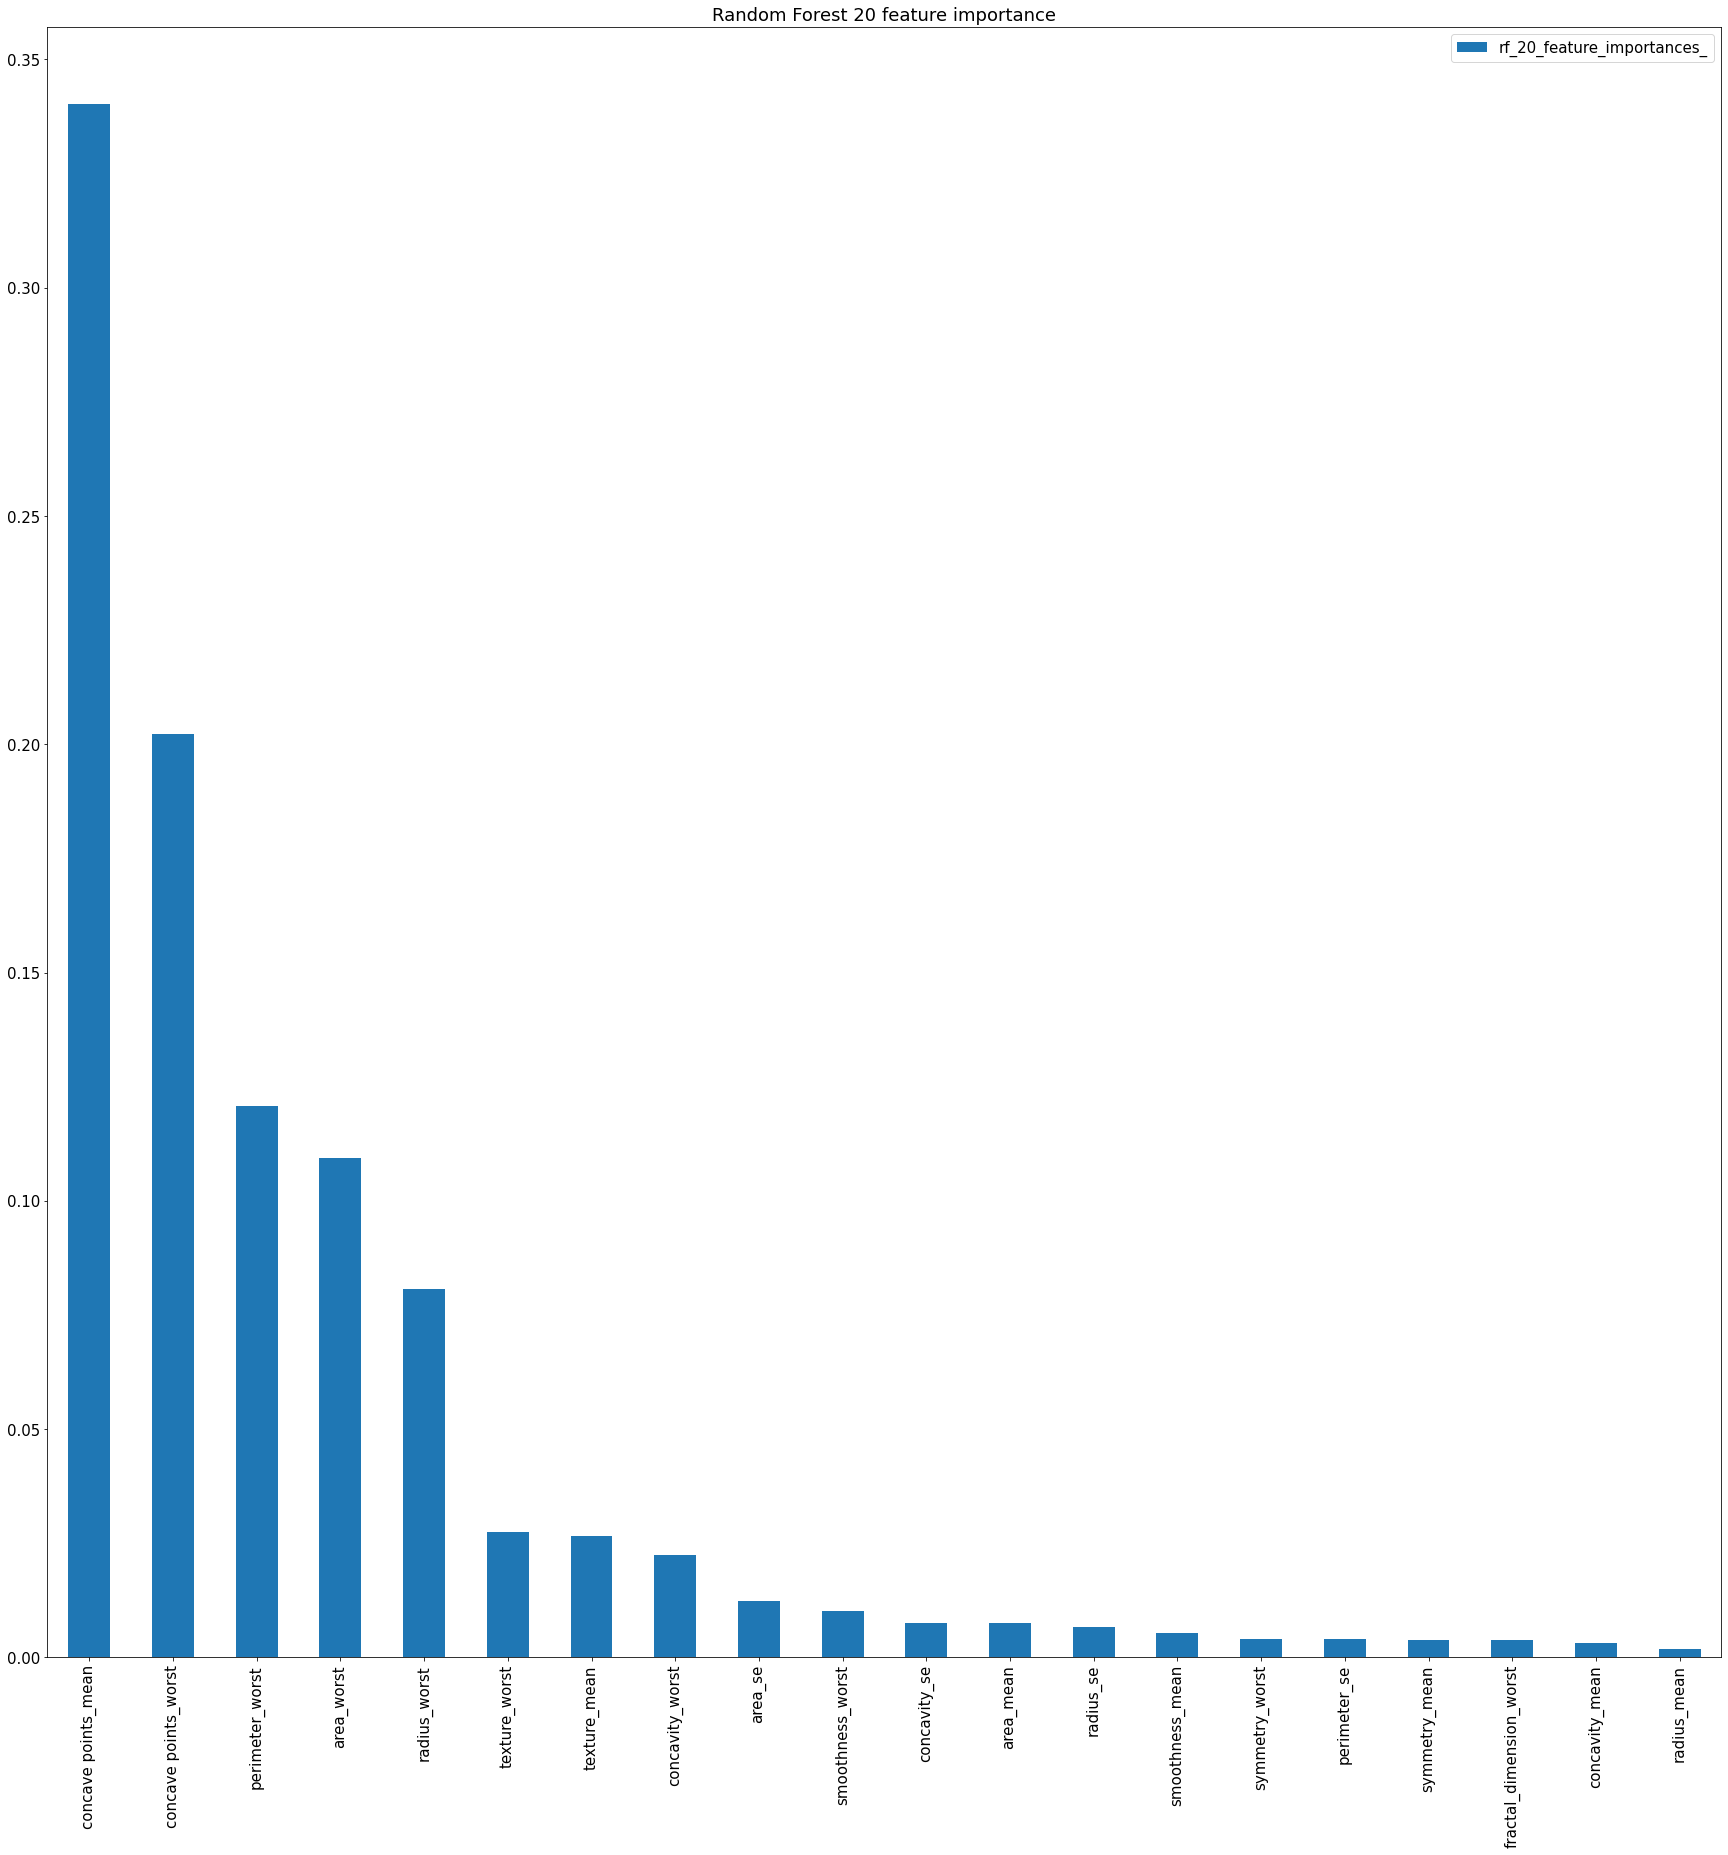

In [71]:
ax = df_fim_20[['feature_names_20','rf_20_feature_importances_']].sort_values(by='rf_20_feature_importances_',ascending=False).plot(kind='bar')
ax.set_title('Random Forest 20 feature importance')
ax.set_xticklabels(df_fim_20.feature_names_20);

__20 Feature Random Forest Best Parameters__

In [78]:
X_20 = df_all_rscaled[['concave points_worst','concave points_mean', 'perimeter_worst', 'area_worst', 'radius_worst',
'texture_worst', 'texture_mean','concavity_worst', 'area_se', 'smoothness_worst', 'radius_se', 'concavity_se', 
'area_mean', 'perimeter_se', 'concavity_mean','symmetry_worst', 'smoothness_mean', 'radius_mean', 
'symmetry_mean', 'fractal_dimension_worst']]
y_20 = df_all_rscaled[['diagnosis']]
X_20=sm.add_constant(X_20)

In [79]:
# Split the data into training and testing sets
X_20_train, X_20_test, y_20_train, y_20_test = train_test_split(X_20, y_20, test_size = 0.30, random_state = 42)
#Instantiate the model
rfm_20 = RandomForestClassifier()
#Tuning parameters and performing cross-validation
# Setup the hyperparameter grid
#number of trees in Forest
n_estimators = np.arange(1,50)
max_depth = np.arange(1,8)
param_grid = {'n_estimators': n_estimators, 'max_depth':max_depth}
# Instantiate the GridSearchCV object: rf_cv
rf_cv_20 = GridSearchCV(rfm_20, param_grid, cv=5, scoring='roc_auc')

#Fitting the model
rf_cv_20.fit(X_20_train, y_20_train.values.ravel())

print("Tuned Random Forest 20 Parameters: {}".format(rf_cv_20.best_params_)) 
print("Best score is 20 features{}".format(rf_cv_20.best_score_))

Tuned Random Forest 20 Parameters: {'max_depth': 4, 'n_estimators': 12}
Best score is 20 features0.9905686136523576


__20 Features Random Forest Model ROC_AUC score__

In [215]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, brier_score_loss, roc_curve, auc
#Instantiate the model with best parameters acquired from GridCV Search
rfm_20 = RandomForestClassifier(max_depth=4, n_estimators=12, random_state = 42)
#Fitting the model
rfm_20.fit(X_20_train, y_20_train.values.ravel())


# Scoring with AUC
print('ROC AUC score 20 Features:', roc_auc_score(y_20_test, rfm_20.predict_proba(X_20_test)[:,1]))

# calculate brier score
brier_loss = brier_score_loss(y_20_test, rfm_20.predict_proba(X_20_test)[:, 1])
print("Brier score is 20 features {}".format(brier_loss))

rf_fpr_20, rf_tpr_20, _ = roc_curve(y_20_test, rfm_20.predict_proba(X_20_test)[:, 1])

ROC AUC score 20 Features: 0.9919165196942974
Brier score is 20 features 0.03371674555212173


__10 Random Forest Feature Importance__

In [81]:
Xtrain_10 = df_all_rscaled[['concave points_worst','concave points_mean',  'area_worst','perimeter_worst', 'radius_worst',
'texture_worst', 'texture_mean','area_se','concavity_worst','smoothness_worst']]
ytrain_10= df_all_rscaled[['diagnosis']]

In [82]:
Xtrain_10=sm.add_constant(Xtrain_10)

In [83]:
X_10 = df_all_rscaled[['concave points_worst','concave points_mean',  'area_worst','perimeter_worst', 'radius_worst',
'texture_worst', 'texture_mean','area_se','concavity_worst','smoothness_worst']]
y_10= df_all_rscaled[['diagnosis']]
Xtrain_10, Xtest_10, ytrain_10, ytest_10 = train_test_split(X_10, y_10, test_size=0.25, random_state=42)

In [84]:
rf_10 = RandomForestRegressor(n_estimators=100)
# rf.fit(X_train, y_train)
rf_10.fit(Xtrain_10, ytrain_10.values.ravel())
# model = forest.fit(train_fold, train_y.values.ravel())

RandomForestRegressor()

In [85]:
rf_10.feature_importances_

array([0.2738999 , 0.296599  , 0.10556363, 0.1288637 , 0.06672665,
       0.03585721, 0.03065219, 0.02509918, 0.01991337, 0.01682518])

In [86]:
feature_names_10 = ['concave points_worst','concave points_mean',  'area_worst','perimeter_worst', 'radius_worst',
'texture_worst', 'texture_mean','area_se','concavity_worst','smoothness_worst']
list_of_tuples = list(zip(feature_names_10, rf_10.feature_importances_))
   
# Assign data to tuples.
list_of_tuples 
 
 
# Converting lists of tuples into
# pandas Dataframe.
df_fim_10 = pd.DataFrame(list_of_tuples,
                  columns = ['feature_names_10', 'rf_10_feature_importances_'])
df_fim_10.sort_values(by=['rf_10_feature_importances_'], inplace=True, ascending=False)   
# Print data.
print(df_fim_10)

       feature_names_10  rf_10_feature_importances_
1   concave points_mean                    0.296599
0  concave points_worst                    0.273900
3       perimeter_worst                    0.128864
2            area_worst                    0.105564
4          radius_worst                    0.066727
5         texture_worst                    0.035857
6          texture_mean                    0.030652
7               area_se                    0.025099
8       concavity_worst                    0.019913
9      smoothness_worst                    0.016825


In [87]:
feature_names_10 = ['concave points_worst','concave points_mean',  'area_worst','perimeter_worst', 'radius_worst',
'texture_worst', 'texture_mean','area_se','concavity_worst','smoothness_worst']
list_of_tuples = list(zip(feature_names_10, rf_10.feature_importances_))
   
# Assign data to tuples.
list_of_tuples 
 
 
# Converting lists of tuples into
# pandas Dataframe.
df_fim_10 = pd.DataFrame(list_of_tuples,
                  columns = ['feature_names_10', 'rf_10_feature_importances_'])
df_fim_10.sort_values(by=['rf_10_feature_importances_'], inplace=True, ascending=False)   
# Print data.
print(df_fim_10)

       feature_names_10  rf_10_feature_importances_
1   concave points_mean                    0.296599
0  concave points_worst                    0.273900
3       perimeter_worst                    0.128864
2            area_worst                    0.105564
4          radius_worst                    0.066727
5         texture_worst                    0.035857
6          texture_mean                    0.030652
7               area_se                    0.025099
8       concavity_worst                    0.019913
9      smoothness_worst                    0.016825


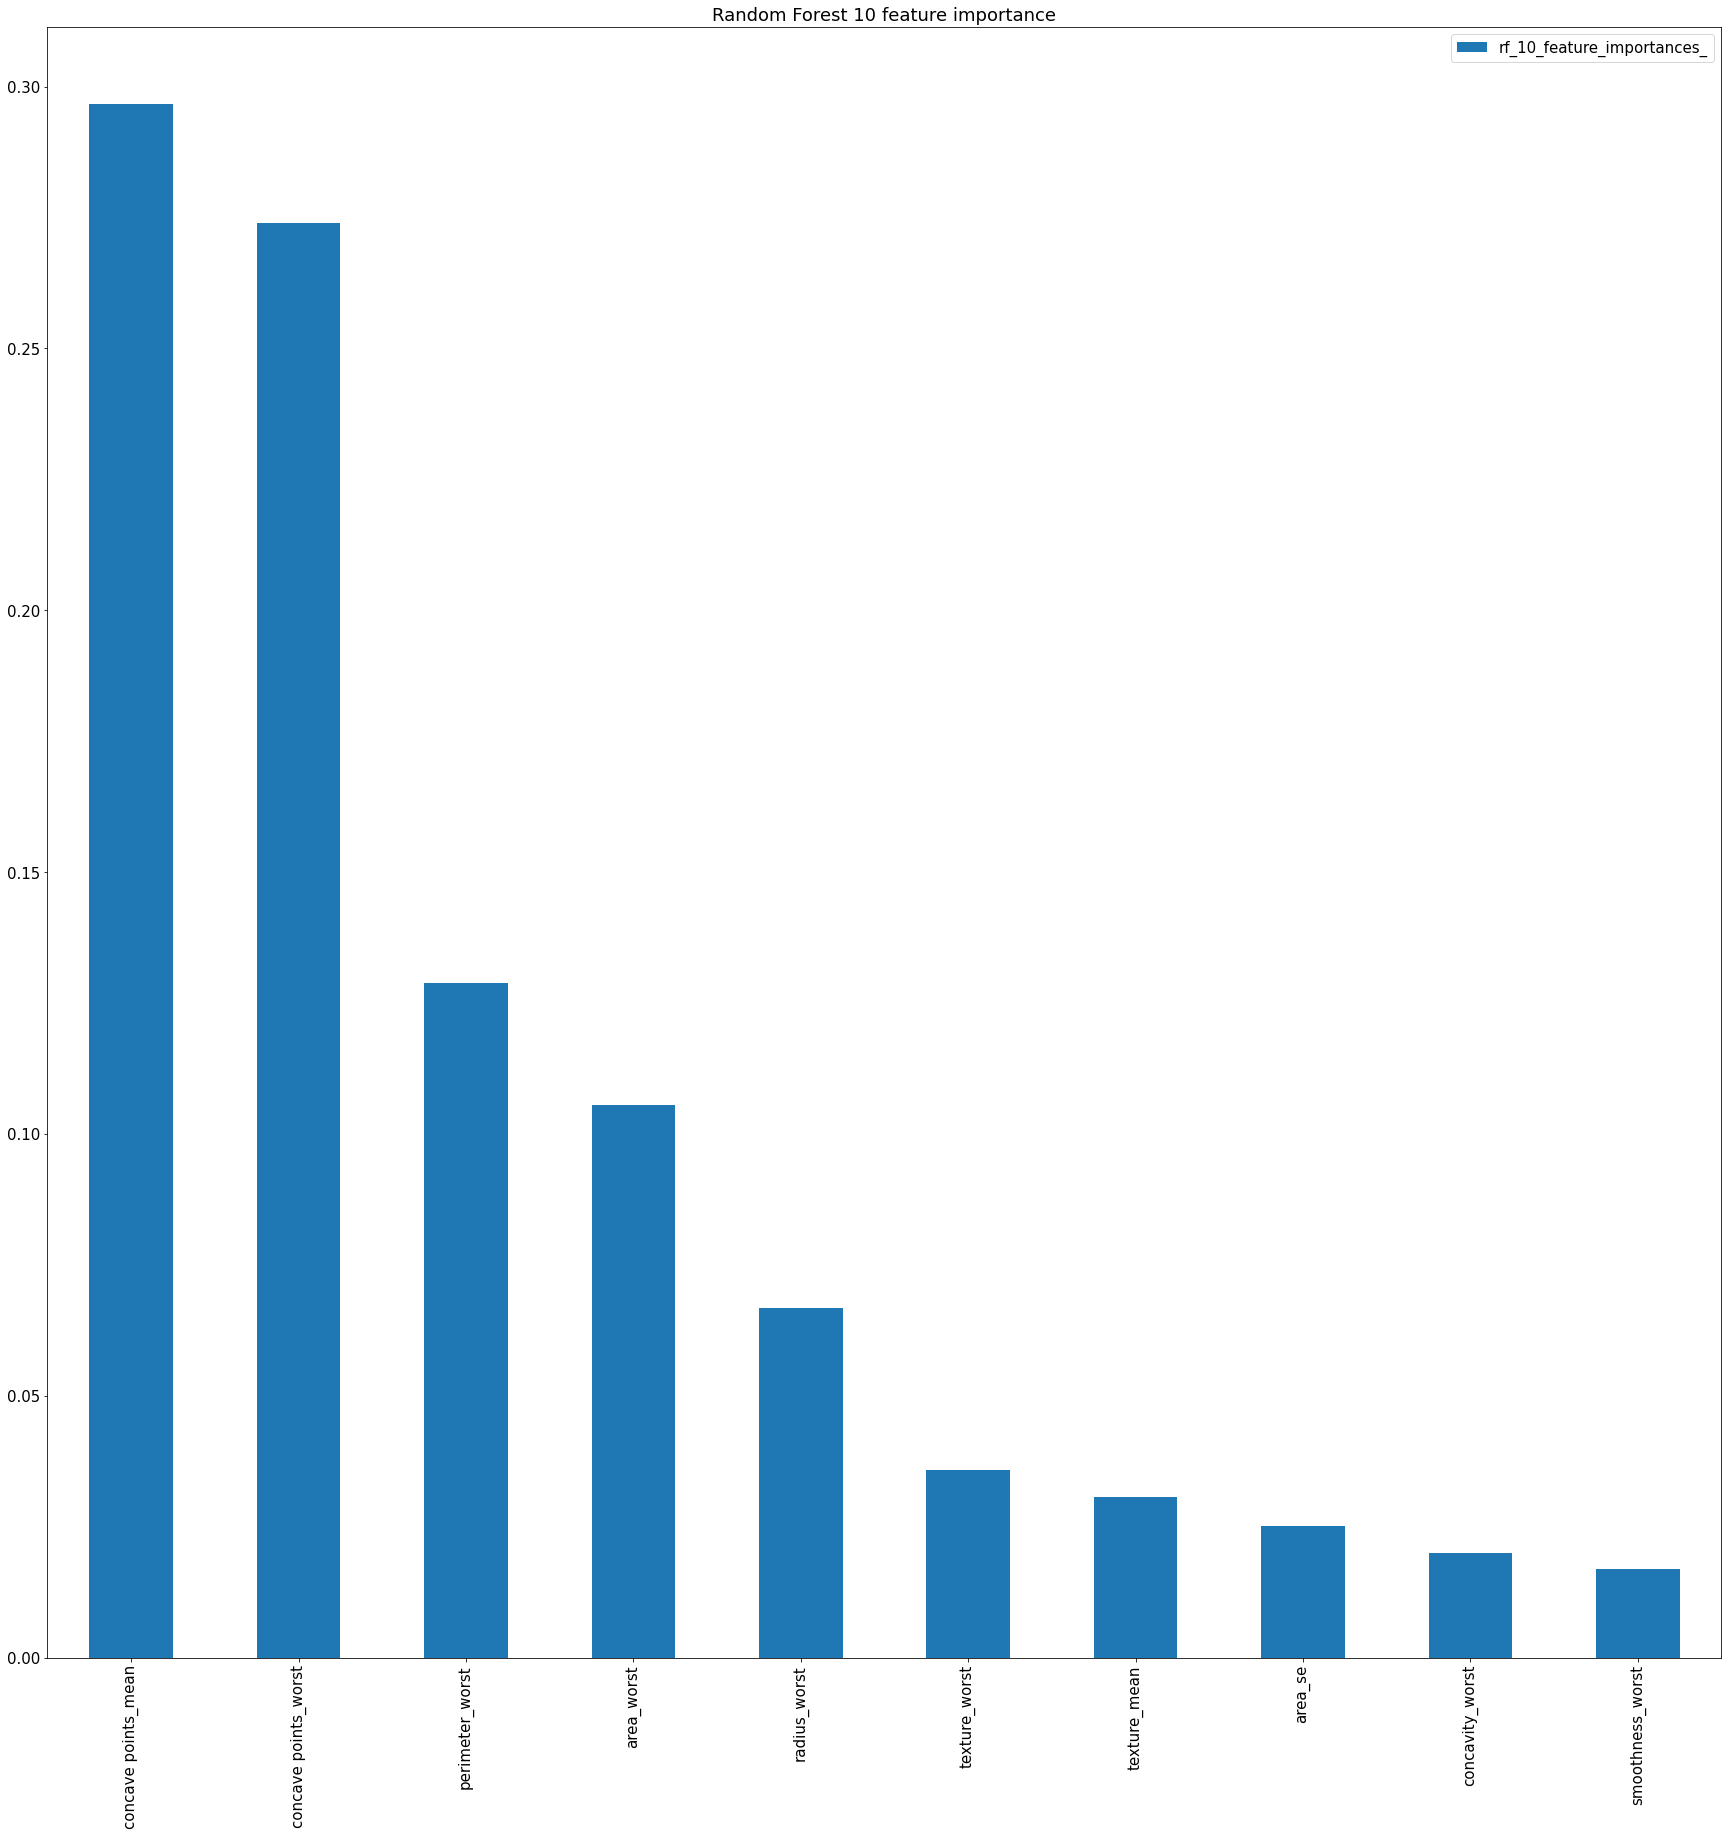

In [88]:
ax = df_fim_10[['feature_names_10', 'rf_10_feature_importances_']].sort_values(by='rf_10_feature_importances_',ascending=False).plot(kind='bar')
ax.set_title('Random Forest 10 feature importance')
ax.set_xticklabels(df_fim_10.feature_names_10);

__10 Feature Random Forest Best Parameters__

In [89]:
X_10 = df_all_rscaled[['concave points_worst','concave points_mean',  'area_worst','perimeter_worst', 'radius_worst',
'texture_worst', 'texture_mean','area_se','concavity_worst','smoothness_worst']]
y_10 = df_all_rscaled[['diagnosis']]
X_10=sm.add_constant(X_10)

In [90]:
# Split the data into training and testing sets
X_10_train, X_10_test, y_10_train, y_10_test = train_test_split(X_10, y_10, test_size = 0.30, random_state = 42)
#Instantiate the model
rfm_10 = RandomForestClassifier()
#Tuning parameters and performing cross-validation
# Setup the hyperparameter grid
#number of trees in Forest
n_estimators = np.arange(1,50)
max_depth = np.arange(1,8)
param_grid = {'n_estimators': n_estimators, 'max_depth':max_depth}
# Instantiate the GridSearchCV object: rf_cv
rf_cv_10 = GridSearchCV(rfm_10, param_grid, cv=5, scoring='roc_auc')

#Fitting the model
rf_cv_10.fit(X_10_train, y_10_train.values.ravel())

print("Tuned Random Forest 10 Parameters: {}".format(rf_cv_10.best_params_)) 
print("Best score is 10 features{}".format(rf_cv_10.best_score_))

Tuned Random Forest 10 Parameters: {'max_depth': 5, 'n_estimators': 17}
Best score is 10 features0.992524607084213


__10 Features Random Forest Model ROC_AUC score__

In [216]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, brier_score_loss, roc_curve, auc
#Instantiate the model with best parameters acquired from GridCV Search
rfm_10 = RandomForestClassifier(max_depth=5, n_estimators=17, random_state = 42)
#Fitting the model
rfm_10.fit(X_10_train, y_10_train.values.ravel())


# Scoring with AUC
print('ROC AUC score 10 Features:', roc_auc_score(y_10_test, rfm_10.predict_proba(X_10_test)[:,1]))

# calculate brier score
brier_loss = brier_score_loss(y_10_test, rfm_10.predict_proba(X_10_test)[:, 1])
print("Brier score is 10 features {}".format(brier_loss))

rf_fpr_10, rf_tpr_10, _ = roc_curve(y_10_test, rfm_10.predict_proba(X_10_test)[:, 1])

ROC AUC score 10 Features: 0.9951499118165785
Brier score is 10 features 0.023242967032358786


__5 Random Forest Feature Importance__

In [92]:
Xtrain_5 = df_all_rscaled[['concave points_mean','concave points_worst', 'perimeter_worst', 'area_worst', 'radius_worst']]
ytrain_5= df_all_rscaled[['diagnosis']]

In [93]:
Xtrain_5=sm.add_constant(Xtrain_5)

In [94]:
X_5 = df_all_rscaled[['concave points_mean','concave points_worst', 'perimeter_worst', 'area_worst', 'radius_worst']]
y_5= df_all_rscaled[['diagnosis']]
Xtrain_5, Xtest_5, ytrain_5, ytest_5 = train_test_split(X_5, y_5, test_size=0.25, random_state=42)

In [95]:
rf_5 = RandomForestRegressor(n_estimators=100)
# rf.fit(X_train, y_train)
rf_5.fit(Xtrain_5, ytrain_5.values.ravel())
# model = forest.fit(train_fold, train_y.values.ravel())

RandomForestRegressor()

In [96]:
rf_5.feature_importances_

array([0.29686468, 0.36338278, 0.10742651, 0.13553023, 0.0967958 ])

In [97]:
feature_names_5 = ['concave points_mean','concave points_worst', 'perimeter_worst', 'area_worst', 'radius_worst']
list_of_tuples = list(zip(feature_names_5, rf_5.feature_importances_))
   
# Assign data to tuples.
list_of_tuples 
 
 
# Converting lists of tuples into
# pandas Dataframe.
df_fim_5 = pd.DataFrame(list_of_tuples,
                  columns = ['feature_names_5', 'rf_5_feature_importances_'])
df_fim_5.sort_values(by=['rf_5_feature_importances_'], inplace=True, ascending=False)   
# Print data.
print(df_fim_5)

        feature_names_5  rf_5_feature_importances_
1  concave points_worst                   0.363383
0   concave points_mean                   0.296865
3            area_worst                   0.135530
2       perimeter_worst                   0.107427
4          radius_worst                   0.096796


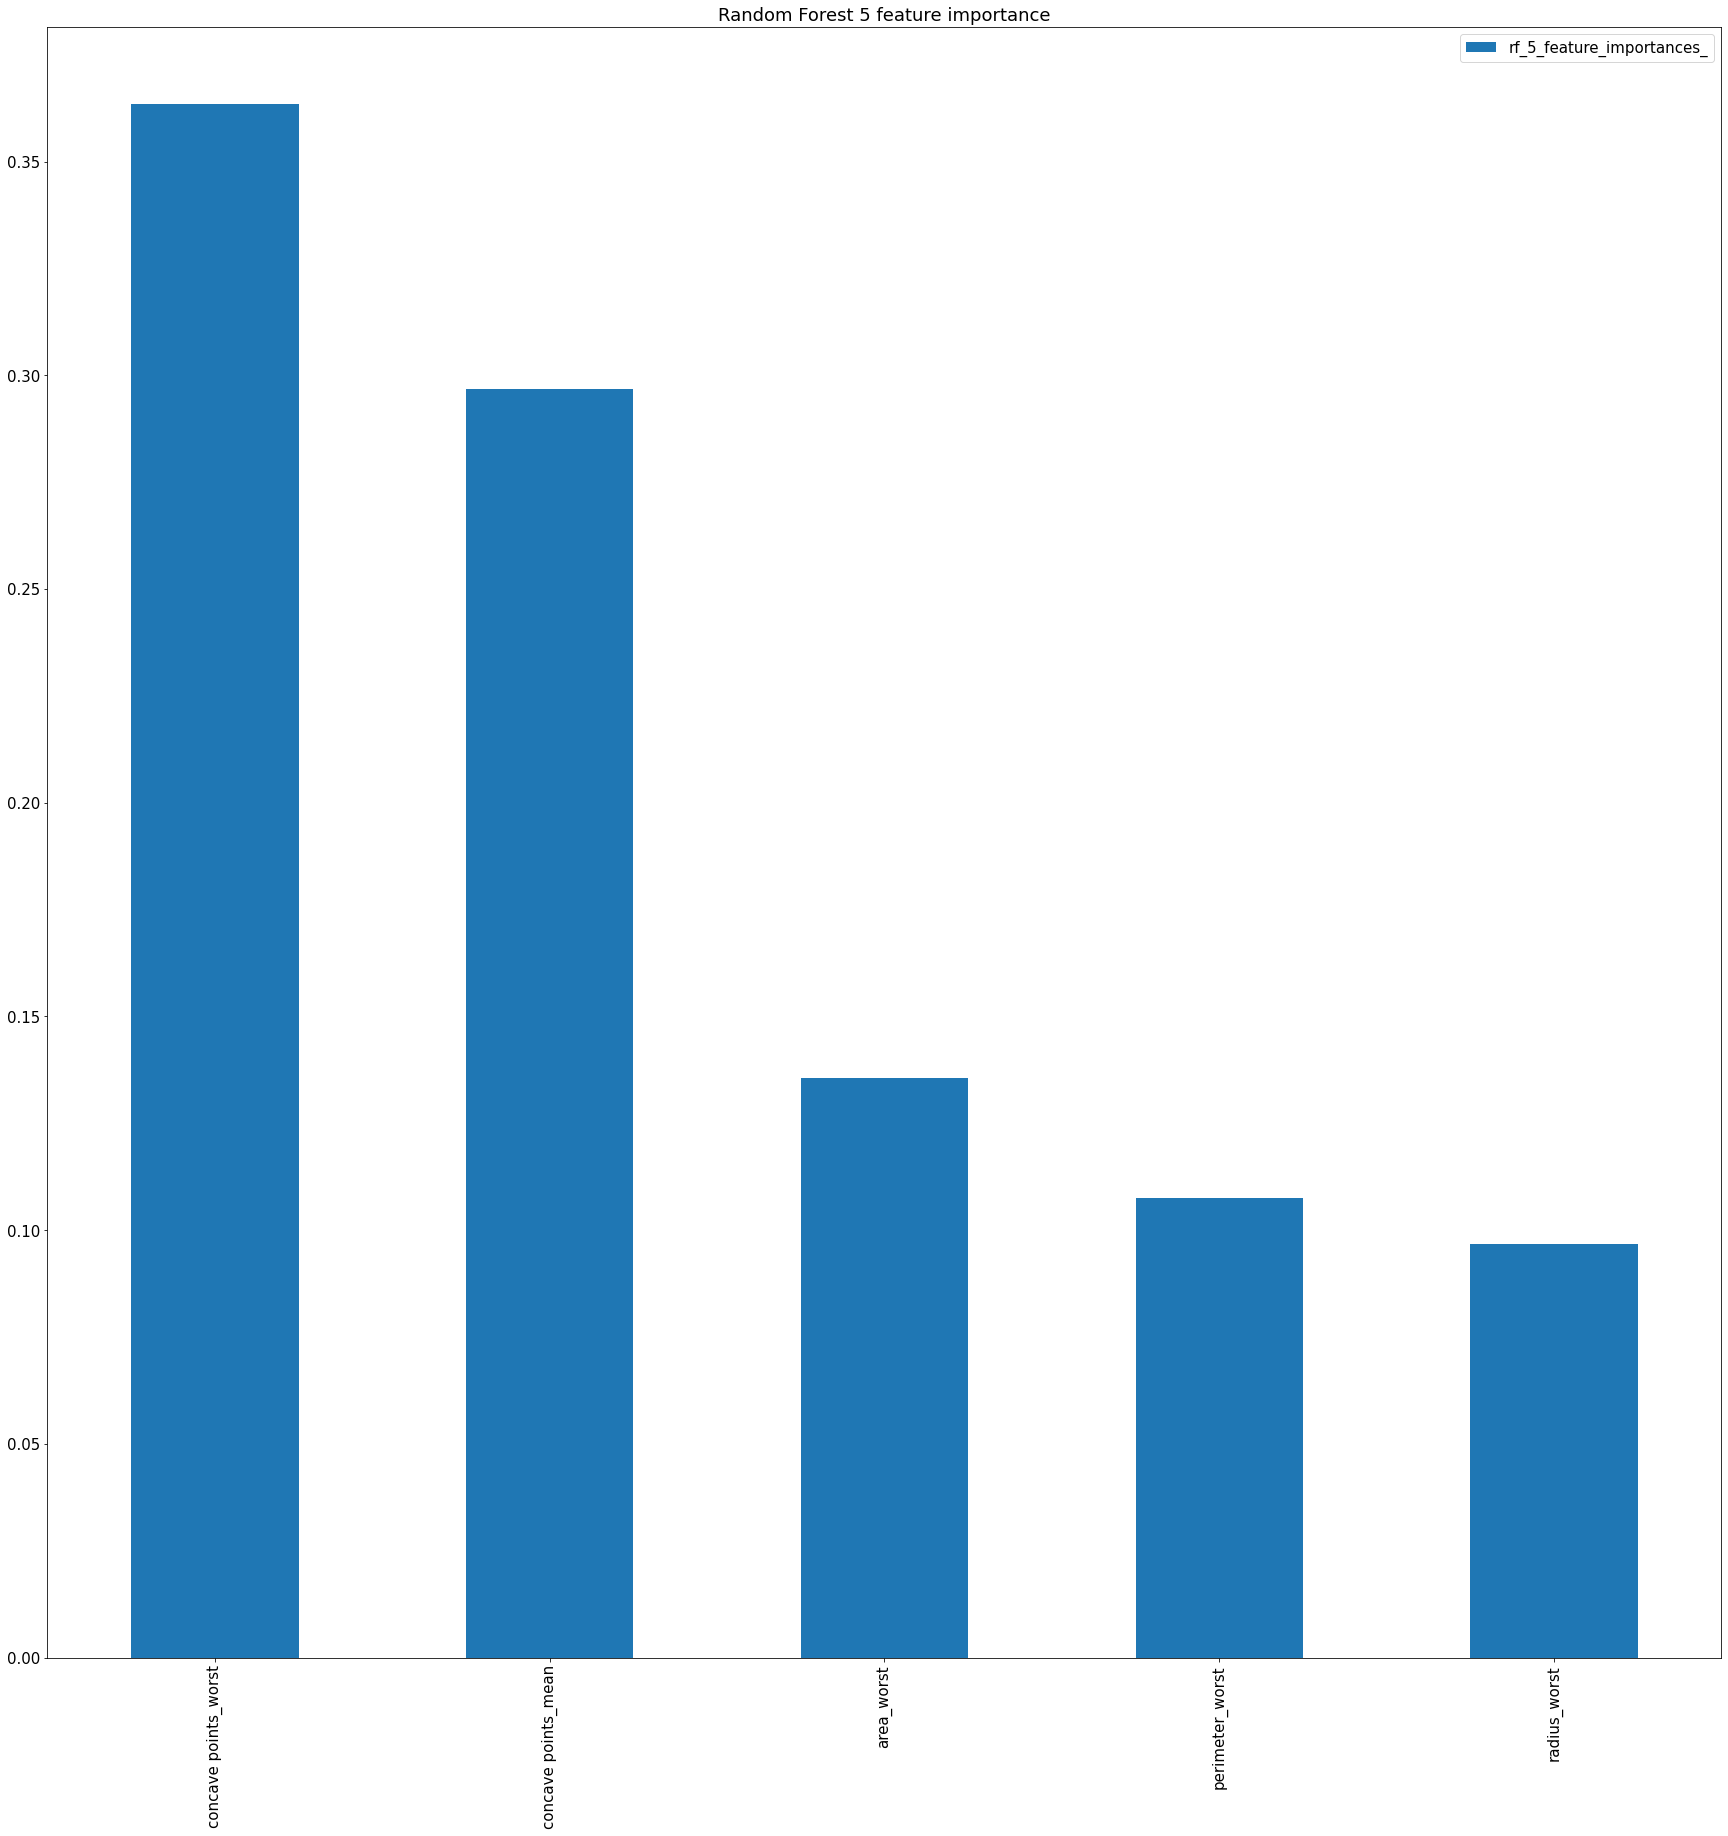

In [98]:
ax = df_fim_5[['feature_names_5', 'rf_5_feature_importances_']].sort_values(by='rf_5_feature_importances_',ascending=False).plot(kind='bar')
ax.set_title('Random Forest 5 feature importance')
ax.set_xticklabels(df_fim_5.feature_names_5);

__5 Feature Random Forest Best Parameters__

In [99]:
X_5 = df_all_rscaled[['concave points_mean','concave points_worst', 'perimeter_worst', 'area_worst', 'radius_worst']]
y_5 = df_all_rscaled[['diagnosis']]
X_5=sm.add_constant(X_5)

In [100]:
# Split the data into training and testing sets
X_5_train, X_5_test, y_5_train, y_5_test = train_test_split(X_5, y_5, test_size = 0.30, random_state = 42)
#Instantiate the model
rfm_5 = RandomForestClassifier()
#Tuning parameters and performing cross-validation
# Setup the hyperparameter grid
#number of trees in Forest
n_estimators = np.arange(1,50)
max_depth = np.arange(1,8)
param_grid = {'n_estimators': n_estimators, 'max_depth':max_depth}
# Instantiate the GridSearchCV object: rf_cv
rf_cv_5 = GridSearchCV(rfm_5, param_grid, cv=5, scoring='roc_auc')

#Fitting the model
rf_cv_5.fit(X_5_train, y_5_train.values.ravel())

print("Tuned Random Forest 5 Parameters: {}".format(rf_cv_5.best_params_)) 
print("Best score is 5 features{}".format(rf_cv_5.best_score_))

Tuned Random Forest 5 Parameters: {'max_depth': 2, 'n_estimators': 44}
Best score is 5 features0.9851508327468919


__5 Features Random Forest Model ROC_AUC score__

In [217]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, brier_score_loss, roc_curve, auc
#Instantiate the model with best parameters acquired from GridCV Search
rfm_5 = RandomForestClassifier(max_depth=2, n_estimators=44, random_state = 42)
#Fitting the model
rfm_5.fit(X_5_train, y_5_train.values.ravel())


# Scoring with AUC
print('ROC AUC score 5 Features:', roc_auc_score(y_5_test, rfm_5.predict_proba(X_5_test)[:,1]))

# calculate brier score
brier_loss = brier_score_loss(y_5_test, rfm_5.predict_proba(X_5_test)[:, 1])
print("Brier score is 5 features {}".format(brier_loss))

rf_fpr_5, rf_tpr_5, _ = roc_curve(y_5_test, rfm_5.predict_proba(X_5_test)[:, 1])

ROC AUC score 5 Features: 0.9936801881246325
Brier score is 5 features 0.03274922710869137


__5 features selected using VIF and feature importance (5v)__

In [64]:
X_5v = df_all_rscaled[['perimeter_worst','smoothness_worst','area_se','concave points_worst', 
                           'texture_mean']]
y_5v = df_all_rscaled[['diagnosis']]
X_5v=sm.add_constant(X_5v)

In [65]:
from sklearn.ensemble import RandomForestRegressor
rf_5v = RandomForestRegressor(n_estimators=100)
# rf.fit(X_train, y_train)
rf_5v.fit(Xtrain_5v, ytrain_5v.values.ravel())
# model = forest.fit(train_fold, train_y.values.ravel())

RandomForestRegressor()

In [66]:
rf_5v.feature_importances_

array([0.        , 0.55411771, 0.03633192, 0.0380937 , 0.3095299 ,
       0.06192677])

In [67]:
feature_names_5v = ['perimeter_worst','smoothness_worst','area_se','concave points_worst', 
                           'texture_mean']
list_of_tuples = list(zip(feature_names_5v, rf_5v.feature_importances_))
   
# Assign data to tuples.
list_of_tuples 
 
 
# Converting lists of tuples into
# pandas Dataframe.
df_fim_5v = pd.DataFrame(list_of_tuples,
                  columns = ['feature_names_5v', 'rf_5v_feature_importances_'])
df_fim_5v.sort_values(by=['rf_5v_feature_importances_'], inplace=True, ascending=False)   
# Print data.
print(df_fim_5v)

       feature_names_5v  rf_5v_feature_importances_
1      smoothness_worst                    0.554118
4          texture_mean                    0.309530
3  concave points_worst                    0.038094
2               area_se                    0.036332
0       perimeter_worst                    0.000000


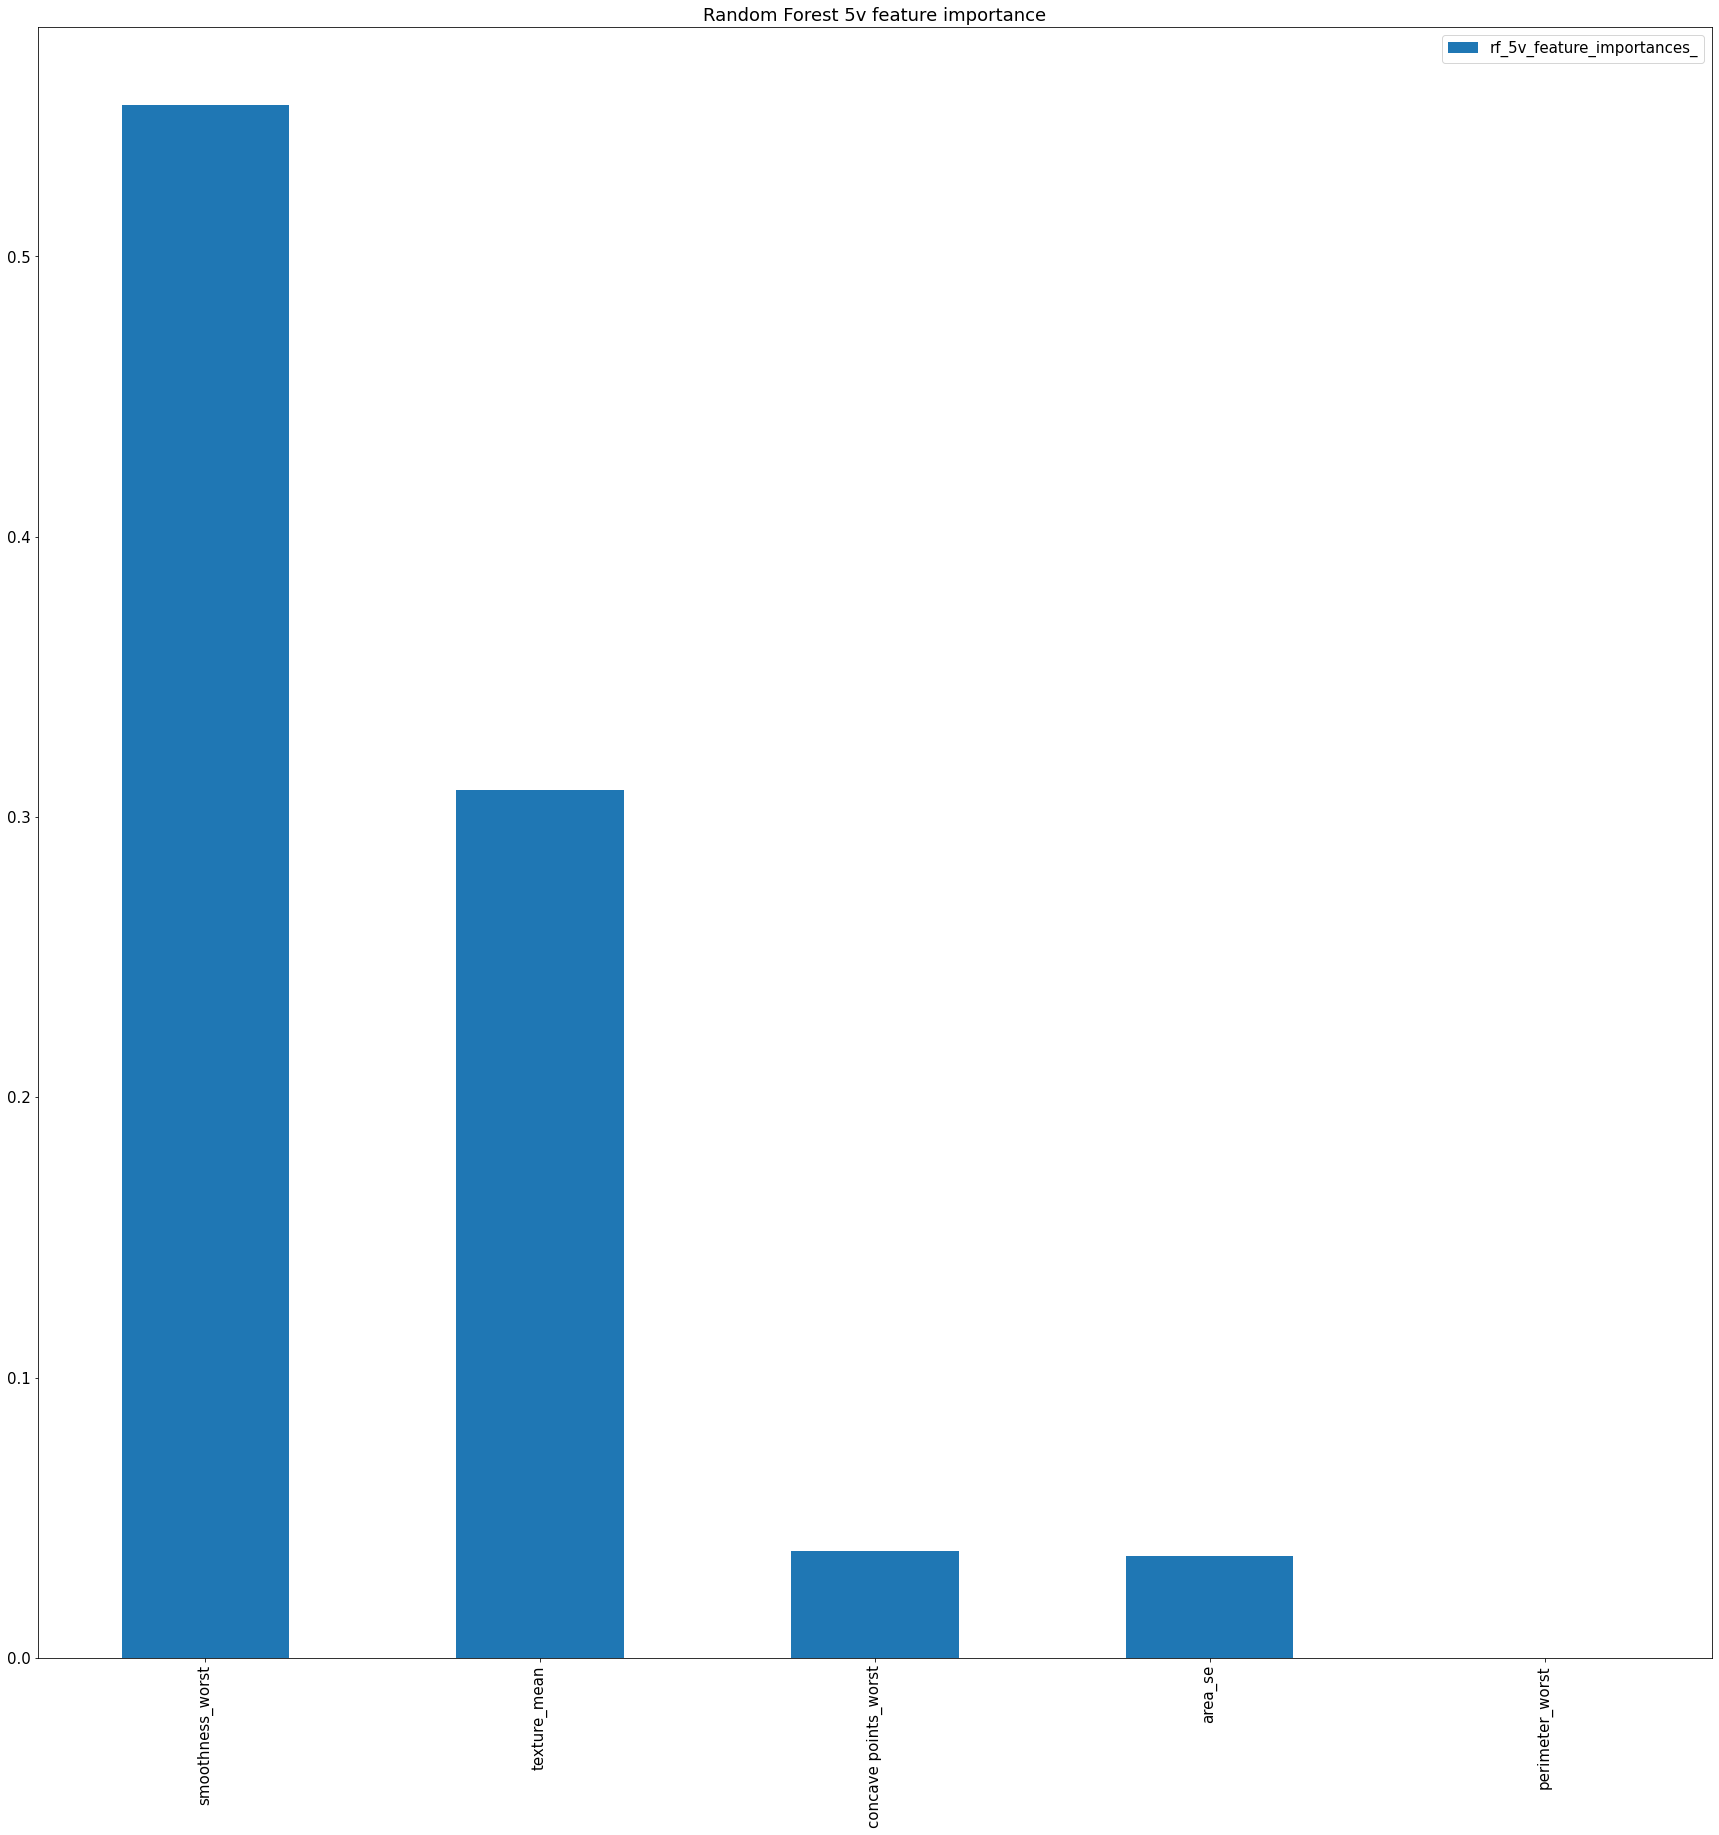

In [68]:
ax = df_fim_5v[['feature_names_5v', 'rf_5v_feature_importances_']].sort_values(by='rf_5v_feature_importances_',ascending=False).plot(kind='bar')
ax.set_title('Random Forest 5v feature importance')
ax.set_xticklabels(df_fim_5v.feature_names_5v);

__5v Feature Random Forest Best Parameters__

In [73]:
X_5v = df_all_rscaled[['perimeter_worst','smoothness_worst','area_se','concave points_worst', 
                           'texture_mean']]
y_5v = df_all_rscaled[['diagnosis']]
X_5v=sm.add_constant(X_5v)

In [74]:
# Split the data into training and testing sets
X_5v_train, X_5v_test, y_5v_train, y_5v_test = train_test_split(X_5v, y_5v, test_size = 0.30, random_state = 42)
#Instantiate the model
rfm_5v = RandomForestClassifier()
#Tuning parameters and performing cross-validation
# Setup the hyperparameter grid
#number of trees in Forest
n_estimators = np.arange(1,50)
max_depth = np.arange(1,8)
param_grid = {'n_estimators': n_estimators, 'max_depth':max_depth}
# Instantiate the GridSearchCV object: rf_cv
rf_5v_cv = GridSearchCV(rfm_5v, param_grid, cv=5, scoring='roc_auc')

#Fitting the model
rf_5v_cv.fit(X_5v_train, y_5v_train.values.ravel())

print("Tuned Random Forest Parameters: {}".format(rf_5v_cv.best_params_)) 
print("Best score is {}".format(rf_5v_cv.best_score_))

Tuned Random Forest Parameters: {'max_depth': 6, 'n_estimators': 26}
Best score is 0.9934320431620925


__5v Features Random Forest Model ROC_AUC score__

In [75]:
from sklearn.metrics import roc_auc_score, brier_score_loss, roc_curve, auc
#Instantiate the model with best parameters acquired from GridCV Search
rfm_5v = RandomForestClassifier(max_depth=6, n_estimators=26)
#Fitting the model
rfm_5v.fit(X_5v_train, y_5v_train.values.ravel())


# Scoring with AUC
print('ROC AUC score:', roc_auc_score(y_5v_test, rfm_5v.predict_proba(X_5v_test)[:,1]))

# calculate brier score
brier_loss = brier_score_loss(y_5v_test, rfm_5v.predict_proba(X_5v_test)[:, 1])
print("Brier score is {}".format(brier_loss))

rf_fpr_5v, rf_tpr_5v, _ = roc_curve(y_5v_test, rfm_5v.predict_proba(X_5v_test)[:, 1])

ROC AUC score: 0.9954438565549677
Brier score is 0.026639970106199763


__Observations__

__Results From Random Forest Model__

ROC_AUC Score

Brier Score

__ALL Features__

0.996766608

0.023232196

__20 Features from RF Feature Importance__

0.99191652

0.033716746

__10 Features from RF Feature Importance__

0.995149912

0.023242967

__5 Features from RF Feature Importance__

0.993680188

0.032749227

__5v Features from VIF and Feature Importance__

0.995443857

0.02663997




__Modeling__

We are comparing different methods of prediction: Random Forest, Gradient Boosting, Logistic Regression for All features 
and 5 features.

To determine the best model the steps described below were followed.

__Tunning for best Parameters__

For our project Grid-Search CV was used

This is one of the hyper parameter tuning method. In this method, a grid of important hyperparameter values is passed and the 
model is evaluated for each and every combination. The set of hyperparameters which gives highest accuracy is considered as
best. 

__Cross validation score (ROC_AUC)__

The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR(true Positive) against FPR (False positive) at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve

__Confusion Matrix__

A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model

__Precision-recall threshold__ 

Some classification tasks require a crisp class label prediction. This means that even though a probability or scoring of class membership is predicted, it must be converted into a crisp class label. The decision for converting a predicted probability or scoring into a class label is governed by a parameter referred to as the “decision threshold,” “discrimination threshold,” or simply the “threshold.” The default value for the threshold is 0.5 for normalized predicted probabilities or scores in the range between 0 or 1. The problem is that the default threshold may not represent an optimal interpretation of the predicted probabilities and when the cost of one type of misclassification is more important than another type of misclassification selecting an optimal threshold is necessary.

__Classification report__

The clasification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True and how many are False. More specifically, True Positives, False Positives, True negatives and False Negatives are used to predict the metrics



__Model Testing for ALL features__

__Gradient Boosting__

In [104]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
X_all = df_all_rscaled[["radius_mean", "texture_mean", "perimeter_mean", "area_mean", 
                             "smoothness_mean", "compactness_mean", "concavity_mean", 
                             "concave points_mean", "symmetry_mean", "radius_se", 
                             "perimeter_se", "area_se",  "compactness_se", "concavity_se", 
                             "concave points_se", "radius_worst", "texture_worst", "perimeter_worst", 
                             "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", 
                             "concave points_worst", "symmetry_worst", "fractal_dimension_worst"]]
y_all = df_all_rscaled[['diagnosis']]
X_all=sm.add_constant(X_all)

# Split the data into training and testing sets
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y_all, test_size = 0.30, random_state = 42)

n_estimators = np.arange(1,50)
max_depth = [1,2,4,8]
learning_rate = [.05,.1,.2,.5,1]

param_dist = {'n_estimators': n_estimators, 'max_depth':max_depth, 'learning_rate':learning_rate}

gbm = GradientBoostingClassifier()
# Instantiate the RandomSearchCV object: 
gbm_cv = RandomizedSearchCV(gbm, param_distributions = param_dist, cv=5, scoring='roc_auc', n_iter=30)

# Fitting the model
gbm_cv.fit(X_all_train, y_all_train.values.ravel())

print("Tuned Gradient Boosting Parameters: {}".format(gbm_cv.best_params_)) 
print("Best score is {}".format(gbm_cv.best_score_))

Tuned Gradient Boosting Parameters: {'n_estimators': 45, 'max_depth': 1, 'learning_rate': 1}
Best score is 0.9905686136523576


In [86]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
gbm = GradientBoostingClassifier(n_estimators= 45, max_depth=1, learning_rate=1, random_state=42).fit(X_all_train, y_all_train.values.ravel())
print('Best ROC AUC:', roc_auc_score(y_all_test, gbm.predict_proba(X_all_test)[:,1]))

# calculate brier score
brier_loss = brier_score_loss(y_all_test, gbm.predict_proba(X_all_test)[:, 1])
print("Brier score is {}".format(brier_loss))

gb_fpr_all, gb_tpr_all, _ = roc_curve(y_all_test, gbm.predict_proba(X_all_test)[:, 1])

Best ROC AUC: 0.9851557907113462
Brier score is 0.03025049170650349


__Logistic Regression__

In [83]:
#Using feature_set1
X_all = df_all_rscaled[["radius_mean", "texture_mean", "perimeter_mean", "area_mean", 
                             "smoothness_mean", "compactness_mean", "concavity_mean", 
                             "concave points_mean", "symmetry_mean", "radius_se", 
                             "perimeter_se", "area_se",  "compactness_se", "concavity_se", 
                             "concave points_se", "radius_worst", "texture_worst", "perimeter_worst", 
                             "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", 
                             "concave points_worst", "symmetry_worst", "fractal_dimension_worst"]]
y_all = df_all_rscaled[['diagnosis']]
X_all=sm.add_constant(X_all)

# Split the data into training and testing sets
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y_all, test_size = 0.30, random_state = 42)


# Setup the hyperparameter grid
c_space = [0.0001, 0.001, .01, .1, .5, 1, 10]
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg_all = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv_all = GridSearchCV(logreg_all, param_grid, cv=5, scoring='roc_auc')

# Fit it to the data
logreg_cv_all.fit(X_all_train,y_all_train.values.ravel())

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv_all.best_params_)) 
print("Best AUC-ROC score is {}".format(logreg_cv_all.best_score_))

# calculate brier score
brier_loss = brier_score_loss(y_all_test, logreg_cv_all.predict_proba(X_all_test)[:, 1])
print("Brier score is {}".format(brier_loss))

#Storing false and true positive rates to plot ROC later
lr_fpr_all, lr_tpr_all, _ = roc_curve(y_all_test, logreg_cv_all.predict_proba(X_all_test)[:, 1])

Tuned Logistic Regression Parameters: {'C': 1}
Best AUC-ROC score is 0.9939533661740558
Brier score is 0.013073021674103898


In [84]:
lr_all = LogisticRegression(C = 1, random_state = 42).fit(X_all_train, y_all_train.values.ravel())
print('Best ROC AUC:', roc_auc_score(y_all_test, lr_all.predict_proba(X_all_test)[:,1]))

# calculate brier score
brier_loss = brier_score_loss(y_all_test, lr_all.predict_proba(X_all_test)[:, 1])
print("Brier score is {}".format(brier_loss))

lr_fpr_all, lr_tpr_all, _ = roc_curve(y_all_test, lr_all.predict_proba(X_all_test)[:, 1])

Best ROC AUC: 0.9982363315696648
Brier score is 0.013073021674103898


__Model ROC_AUC Score for All features__

Random Forest 0.99676660

Boosting Gradient 0.98515579

Logistic Regression 0.998236332



__Model evaluation visualization for ALL features__

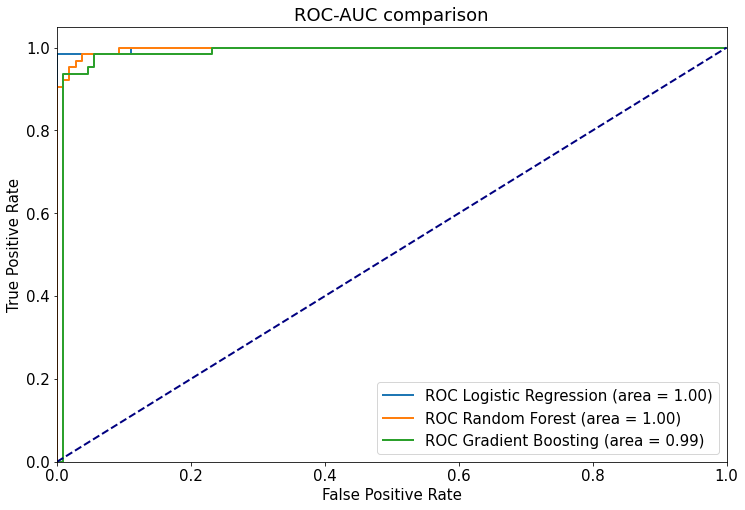

In [87]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(12,8))

for fpr, tpr, model in [(lr_fpr_all,lr_tpr_all,'Logistic Regression'),(rf_fpr_all,rf_tpr_all,'Random Forest'),(gb_fpr_all,gb_tpr_all,'Gradient Boosting')]:
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr,
             lw=2, label='ROC '+ model + ' (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC comparison')
plt.legend(loc="lower right")
plt.show()

__Confusion Matrix for All Features__

In [88]:
from sklearn.metrics import confusion_matrix, fbeta_score

# #Using the Random Forest Model the confusion matrix is generated
X_all = df_all_rscaled[["radius_mean", "texture_mean", "perimeter_mean", "area_mean", 
                             "smoothness_mean", "compactness_mean", "concavity_mean", 
                             "concave points_mean", "symmetry_mean", "radius_se", 
                             "perimeter_se", "area_se",  "compactness_se", "concavity_se", 
                             "concave points_se", "radius_worst", "texture_worst", "perimeter_worst", 
                             "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", 
                             "concave points_worst", "symmetry_worst", "fractal_dimension_worst"]]
y_all = df_all_rscaled[['diagnosis']]
X_all = sm.add_constant(X_all)

# Split the data into training and testing sets
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y_all, test_size = 0.30, random_state = 42)
confusion_lrm = confusion_matrix(y_all_test, logreg_cv_all.predict(X_all_test))
print(confusion_lrm)

[[108   0]
 [  1  62]]


<Figure size 2160x2160 with 0 Axes>

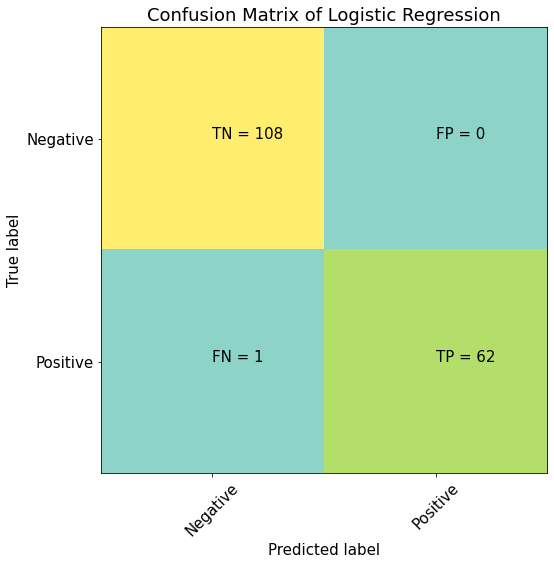

In [82]:
cm = confusion_matrix(y_all_test, logreg_cv_all.predict(X_all_test))
plt.clf()
plt.figure(figsize=(8,12))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Set3)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix of Logistic Regression')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [89]:
from sklearn.metrics import classification_report

def precision_recall(logreg_cv_all, X_all_test, y_all_test, threshold, beta = 2.):
    
    y_all_pred = (logreg_cv_all.predict_proba(X_all_test)[:,1] >= threshold).astype(bool)
    matrix = confusion_matrix(y_all_test, y_all_pred)
    
    #print(threshold,'\n', matrix)
    
    tn = matrix[0,0]# tumors that were predicted to be benign and did
    tp = matrix[1,1]# tumors that were predicted to be malignant and did
    fp = matrix[0,1]# tumors that were predicted to be malignant but where benign
    fn = matrix[1,0]# tumors that were predicted to be benign but where malignant
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    f_beta = fbeta_score(y_all_test, y_all_pred, beta=beta)
    
    return([precision, recall, f_beta])

__Finding the Optimal Threshold__

In [90]:
threshold_df = pd.DataFrame(columns=['Precision','Recall','F_measure'])

for threshold in np.arange(0.0,1.0,0.02):
    
    threshold_df.loc[threshold] = precision_recall(logreg_cv_all, X_all_test, y_all_test, threshold)
 
print(threshold_df)

      Precision    Recall  F_measure
0.00   0.368421  1.000000   0.744681
0.02   0.677419  1.000000   0.913043
0.04   0.768293  1.000000   0.943114
0.06   0.818182  1.000000   0.957447
0.08   0.828947  1.000000   0.960366
0.10   0.849315  0.984127   0.953846
0.12   0.861111  0.984127   0.956790
0.14   0.885714  0.984127   0.962733
0.16   0.885714  0.984127   0.962733
0.18   0.885714  0.984127   0.962733
0.20   0.885714  0.984127   0.962733
0.22   0.911765  0.984127   0.968750
0.24   0.925373  0.984127   0.971787
0.26   0.925373  0.984127   0.971787
0.28   0.925373  0.984127   0.971787
0.30   0.925373  0.984127   0.971787
0.32   0.953846  0.984127   0.977918
0.34   0.953846  0.984127   0.977918
0.36   0.968750  0.984127   0.981013
0.38   0.984127  0.984127   0.984127
0.40   0.984127  0.984127   0.984127
0.42   0.984127  0.984127   0.984127
0.44   0.984127  0.984127   0.984127
0.46   0.984127  0.984127   0.984127
0.48   0.984127  0.984127   0.984127
0.50   1.000000  0.984127   0.987261
0

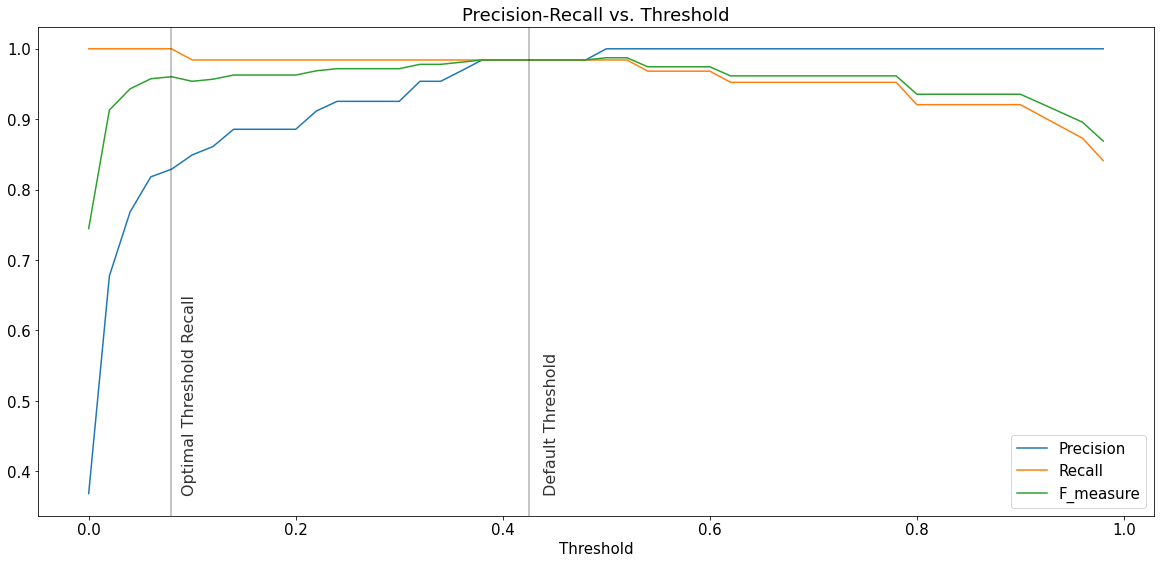

In [97]:
ax = threshold_df.plot(figsize=(20,9))
ax.set_xlabel('Threshold')
ax.set_title('Precision-Recall vs. Threshold')
ax.axvline(0.08, color='black', alpha=0.3)
ax.text(.09,.37,'Optimal Threshold Recall',rotation=90, alpha=0.8, fontsize=16)
ax.axvline(0.425, color ='black', alpha = 0.3)
ax.text(.44,.37,'Default Threshold',rotation=90, alpha=0.8,fontsize=16);

__Clasification Report for ALL features__

In [86]:
y_all_pred = (logreg_cv_all.predict_proba(X_all_test)[:,1] >= 0.08).astype(bool)

print(classification_report(y_all_test,y_all_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.88      0.94       108
         1.0       0.83      1.00      0.91        63

    accuracy                           0.92       171
   macro avg       0.91      0.94      0.92       171
weighted avg       0.94      0.92      0.93       171



In [114]:
y_all_pred = (logreg_cv_all.predict_proba(X_all_test)[:,1] >= 0.08).astype(bool)

In [116]:
cm=confusion_matrix(y_all_test, y_all_pred)
print(cm_all)

[[95 13]
 [ 0 63]]


__Confusion Matrix for ALL Features with Recall =1__

<Figure size 2160x2160 with 0 Axes>

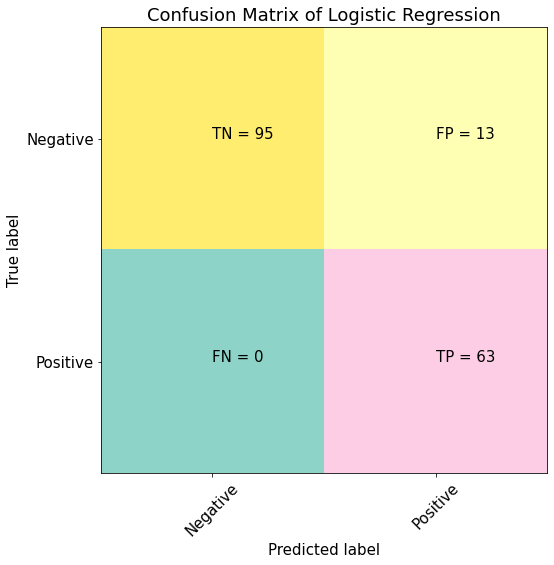

In [117]:
# cm = confusion_matrix(y_all_test, logreg_cv_all.predict(X_all_test))
plt.clf()
plt.figure(figsize=(8,12))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Set3)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix of Logistic Regression')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

__Model Testing for 5 Features (selected based on VIF and feature importance)__

__Gradient Boosting__

In [87]:
X_5v = df_all_rscaled[['perimeter_worst','smoothness_worst','area_se','concave points_worst', 
                           'texture_mean']]
y_5v = df_all_rscaled[['diagnosis']]
X_5v=sm.add_constant(X_5v)

In [143]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
X_5v = df_all_rscaled[['perimeter_worst','smoothness_worst','area_se','concave points_worst', 
                           'texture_mean']]
y_5v = df_all_rscaled[['diagnosis']]
X_5v=sm.add_constant(X_5v)

# Split the data into training and testing sets
X_5v_train, X_5v_test, y_5v_train, y_5v_test = train_test_split(X_5v, y_5v, test_size = 0.30, random_state = 42)

n_estimators = np.arange(1,50)
max_depth = [1,2,4,8]
learning_rate = [.05,.1,.2,.5,1]

param_dist = {'n_estimators': n_estimators, 'max_depth':max_depth, 'learning_rate':learning_rate}

gbm_5v = GradientBoostingClassifier()
# Instantiate the RandomSearchCV object: 
gbm_5v_cv = RandomizedSearchCV(gbm_5v, param_distributions = param_dist, cv=5, scoring='roc_auc', n_iter=30)

# Fitting the model
gbm_5v_cv.fit(X_5v_train, y_5v_train.values.ravel())

print("Tuned Gradient Boosting Parameters: {}".format(gbm_5v_cv.best_params_)) 
print("Best score is {}".format(gbm_5v_cv.best_score_))

Tuned Gradient Boosting Parameters: {'n_estimators': 20, 'max_depth': 1, 'learning_rate': 0.5}
Best score is 0.9902851513019002


In [102]:
gbm_5v = GradientBoostingClassifier(n_estimators= 20, max_depth= 1, learning_rate=0.5, random_state=42).fit(X_5v_train, y_5v_train.values.ravel())
print('Best ROC AUC:', roc_auc_score(y_5v_test, gbm_5v.predict_proba(X_5v_test)[:,1]))

# calculate brier score
brier_loss = brier_score_loss(y_5v_test, gbm_5v.predict_proba(X_5v_test)[:, 1])
print("Brier score is {}".format(brier_loss))

gb_5v_fpr, gb_5v_tpr, _ = roc_curve(y_5v_test, gbm_5v.predict_proba(X_5v_test)[:, 1])

Best ROC AUC: 0.9956643151087595
Brier score is 0.024936808135006726


__Logistic Regression__

In [99]:
#Using feature_set1
X_5v = df_all_rscaled[['perimeter_worst','smoothness_worst','area_se','concave points_worst', 
                           'texture_mean']]
y_5v = df_all_rscaled[['diagnosis']]
X_5v=sm.add_constant(X_5v)

# Split the data into training and testing sets
X_5v_train, X_5v_test, y_5v_train, y_5v_test = train_test_split(X_5v, y_5v, test_size = 0.30, random_state = 42)


# Setup the hyperparameter grid
c_space = [0.0001, 0.001, .01, .1, .5, 1, 10]
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg_5v = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_5v_cv = GridSearchCV(logreg_5v, param_grid, cv=5, scoring='roc_auc')

# Fit it to the data
logreg_5v_cv.fit(X_5v_train,y_5v_train.values.ravel())

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_5v_cv.best_params_)) 
print("Best AUC-ROC score is {}".format(logreg_5v_cv.best_score_))

# calculate brier score
brier_loss = brier_score_loss(y_5v_test, logreg_5v_cv.predict_proba(X_5v_test)[:, 1])
print("Brier score is {}".format(brier_loss))

#Storing false and true positive rates to plot ROC later
lr_fpr_5v, lr_tpr_5v, _ = roc_curve(y_5v_test, logreg_5v_cv.predict_proba(X_5v_test)[:, 1])

Tuned Logistic Regression Parameters: {'C': 1}
Best AUC-ROC score is 0.9927393854093362
Brier score is 0.015712575066601314


In [100]:
from sklearn.metrics import roc_auc_score, brier_score_loss, roc_curve, auc
lr_5v = LogisticRegression(C = 1, random_state = 42).fit(X_5v_train, y_5v_train.values.ravel())
print('Best ROC AUC:', roc_auc_score(y_5v_test, lr_5v.predict_proba(X_5v_test)[:,1]))

# calculate brier score
brier_loss = brier_score_loss(y_5v_test, lr_5v.predict_proba(X_5v_test)[:, 1])
print("Brier score is {}".format(brier_loss))

lr_fpr_5v, lr_tpr_5v, _ = roc_curve(y_5v_test, lr_5v.predict_proba(X_5v_test)[:, 1])

Best ROC AUC: 0.9988242210464433
Brier score is 0.015712575066601314


__Model	ROC_AUC Score for 5v features__

Random Forest	0.995443857

Boosting Gradient	0.995664315

Logistic Regression 0.998824221


__Model evaluation visualization for 5v features__

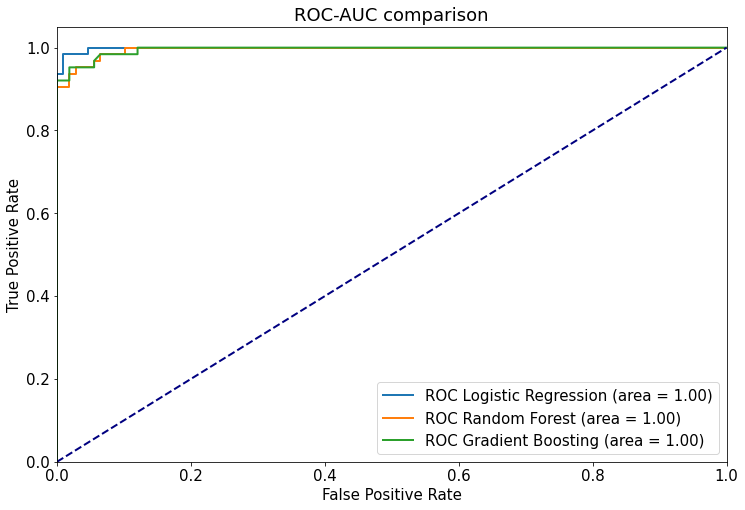

In [103]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(12,8))

for fpr, tpr, model in [(lr_fpr_5v,lr_tpr_5v,'Logistic Regression'),(rf_fpr_5v,rf_tpr_5v,'Random Forest'),(gb_5v_fpr,gb_5v_tpr,'Gradient Boosting')]:
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr,
             lw=2, label='ROC '+ model + ' (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC comparison')
plt.legend(loc="lower right")
plt.show()

__Observation__

Logistic Regression for 5 features have the highest ROC_AUC score

__Cofusion Matrix 5v features__

In [106]:
from sklearn.metrics import confusion_matrix, fbeta_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
# #Using the Random Forest Model the confusion matrix is generated
X_5v = df_all_rscaled[['perimeter_worst','smoothness_worst','area_se','concave points_worst', 
                           'texture_mean']]
y_5v = df_all_rscaled[['diagnosis']]
X_5v=sm.add_constant(X_5v)

# Split the data into training and testing sets
X_5v_train, X_5v_test, y_5v_train, y_5v_test = train_test_split(X_5v, y_5v, test_size = 0.30, random_state = 42)
confusion_lrm_5v = confusion_matrix(y_5v_test, logreg_5v_cv.predict(X_5v_test))
print(confusion_lrm_5v)


[[107   1]
 [  2  61]]


<Figure size 2160x2160 with 0 Axes>

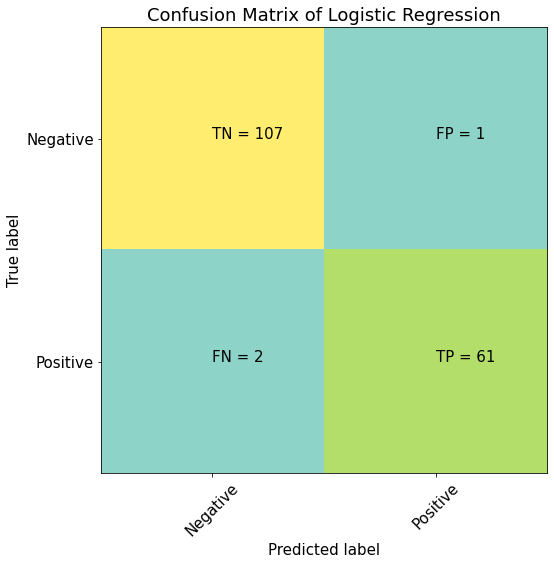

In [94]:
cm=confusion_matrix(y_5v_test, logreg_5v_cv.predict(X_5v_test))
plt.clf()
plt.figure(figsize=(8,12))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Set3)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix of Logistic Regression')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

__Finding the Optimal Threshold__

In [95]:
from sklearn.metrics import classification_report

def precision_recall(logreg_5v_cv, X_5v_test, y_5v_test, threshold, beta = 2.):
    
    y_5v_pred = (logreg_5v_cv.predict_proba(X_5v_test)[:,1] >= threshold).astype(bool)
    matrix = confusion_matrix(y_5v_test, y_5v_pred)
    
    #print(threshold,'\n', matrix)
    
    tn = matrix[0,0]# tumors that were predicted to be benign and did
    tp = matrix[1,1]# tumors that were predicted to be malignant and did
    fp = matrix[0,1]# tumors that were predicted to be benign but where malignant
    fn = matrix[1,0]# tumors that were predicted to be malign but where benign
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    f_beta = fbeta_score(y_5v_test, y_5v_pred, beta=beta)
    
    return([precision, recall, f_beta])

In [96]:
threshold_df_5v = pd.DataFrame(columns=['Precision','Recall','F_measure'])

for threshold in np.arange(0.0,1,0.05):
    
    threshold_df_5v.loc[threshold] = precision_recall(logreg_5v_cv, X_5v_test, y_5v_test, threshold)
 
print(threshold_df_5v)

      Precision    Recall  F_measure
0.00   0.368421  1.000000   0.744681
0.05   0.700000  1.000000   0.921053
0.10   0.818182  1.000000   0.957447
0.15   0.851351  1.000000   0.966258
0.20   0.887324  1.000000   0.975232
0.25   0.926471  1.000000   0.984375
0.30   0.939394  0.984127   0.974843
0.35   0.953846  0.984127   0.977918
0.40   0.968750  0.984127   0.981013
0.45   0.983871  0.968254   0.971338
0.50   0.983871  0.968254   0.971338
0.55   0.983871  0.968254   0.971338
0.60   0.983607  0.952381   0.958466
0.65   1.000000  0.936508   0.948553
0.70   1.000000  0.936508   0.948553
0.75   1.000000  0.904762   0.922330
0.80   1.000000  0.904762   0.922330
0.85   1.000000  0.888889   0.909091
0.90   1.000000  0.857143   0.882353
0.95   1.000000  0.793651   0.827815


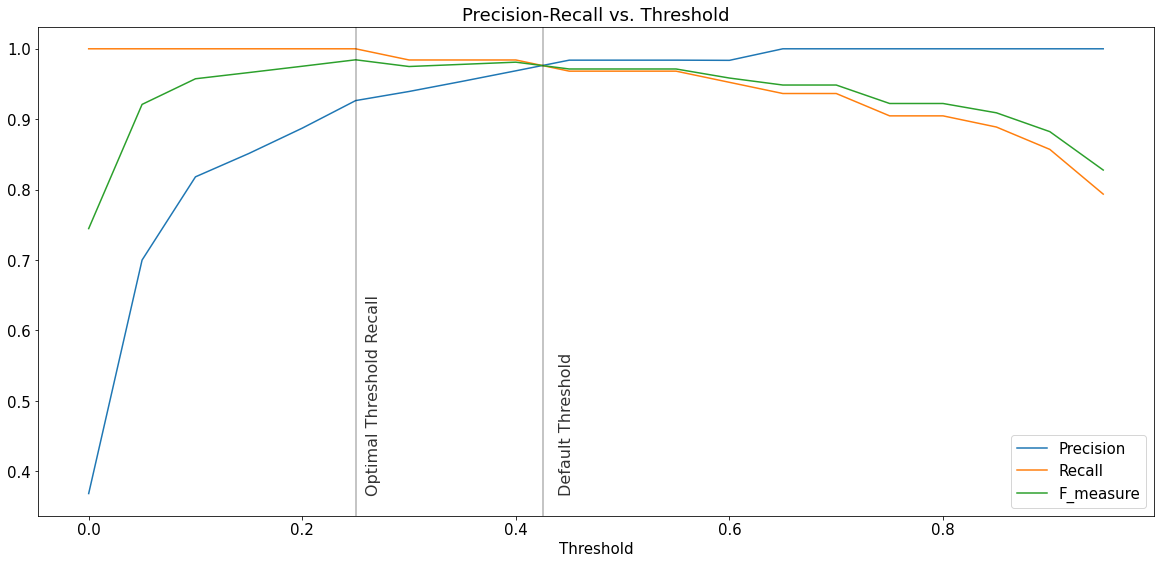

In [184]:
ax = threshold_df_5v.plot(figsize=(20,9))
ax.set_xlabel('Threshold')
ax.set_title('Precision-Recall vs. Threshold')
ax.axvline(0.25, color='black', alpha=0.3)
ax.text(.26,.37,'Optimal Threshold Recall',rotation=90, alpha=0.8, fontsize=16)
ax.axvline(0.425, color ='black', alpha = 0.3)
ax.text(.44,.37,'Default Threshold',rotation=90, alpha=0.8,fontsize=16);

__Clasification Report for 5v features__

In [111]:
y_5v_pred = (logreg_5v_cv.predict_proba(X_5v_test)[:,1] >= 0.25).astype(bool)

print(classification_report(y_5v_test,y_5v_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98       108
         1.0       0.93      1.00      0.96        63

    accuracy                           0.97       171
   macro avg       0.96      0.98      0.97       171
weighted avg       0.97      0.97      0.97       171



__Confusion Matrix for 5v Features with Recall =1__

In [112]:
y_5v_pred=(logreg_5v_cv.predict_proba(X_5v_test)[:,1] >= 0.25).astype(bool)
cm=confusion_matrix(y_5v_test, y_5v_pred)
print(cm)

[[103   5]
 [  0  63]]


<Figure size 2160x2160 with 0 Axes>

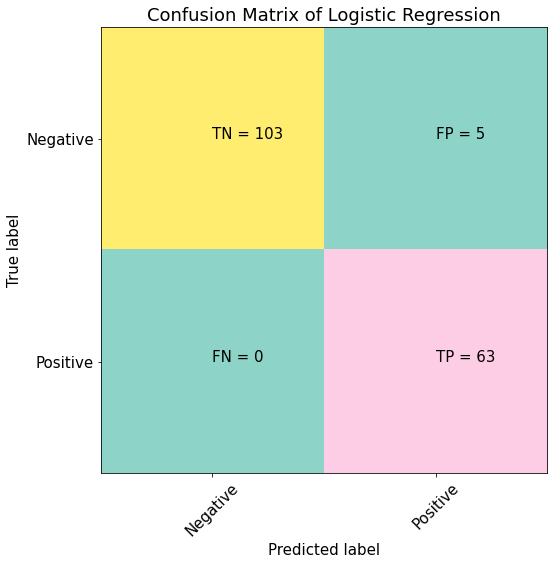

In [113]:
# cm=confusion_matrix(y_5v_test, logreg_5v_cv.predict(X_5v_test))
plt.clf()
plt.figure(figsize=(8,12))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Set3)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix of Logistic Regression')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

__Conclusion__

The best model to be used for diagnosing breast cancer as found in this analysis is the Logistic Regression model with the following 5 predictors: perimeter_worst, smoothness_worst, area_se, concave points_worst and texture_mean. 
Even though the results obtained from ALL features were good as well and did better in the Random Forest we have to keep in mind that they are based on very small dataset, and for such small data is better to have a less complex model to avoid overfitting. 
An accuracy of 97% was achieved using the Logistic Regression model with emphasis in obtaining a higher recall. When predicting breast cancer, minimizing the false negatives are crucial. A false negative would be in our case telling a patient that does not have cancer when in reality they have it.
The future work for this project would involve the study of larger data sets and expansion of the number of classifiers to better understand which are most efficient in model prediction. 
